In [1350]:
import pandas as pd

# Leer el archivo CSV
file_path = r'C:\Users\SantiagoGarcía\Desktop\Duppla\Data\datos_prueba_técnica- Data.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
display(data.head())


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,bogota,2ddadeec-878a-4053-889f-73fdd8e9c4b3,MercadoLibre,MCO-1550457973,APARTAMENTO,FOR_SALE,CUNDINAMARCA,Usaquén,Oportunidad única de inversión!,NaN,5,-74,30,NaN,1,1,0,235000000,NaN,NaN,COP,4,"267,000",False,"2,023",USED,2025-04-21,NaN,https://apartamento.mercadolibre.com.co/MCO-1550457973-vendo-apartaestudio-n...,Oportunidad única de inversión! Se vende moderno apartamento tipo estudio de...,NaN,10,NaN,2025-04-21 00:00:00,2025-04-21
1,BOGOTÁ,9dab8777-c6ea-49af-aae1-46a0c5c31080,Fincaraiz,191885592,Apartamento,FOR_SALE,Cundinamarca,Antonio Nariño,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona centro, Antonio nariño, San antonio de padua, Cal...",5,-74,110,NaN,4,2,0,380000000,"92,283","4,118",COP,3,NaN,NaN,"2,002",-,2025-01-18,2025-01-16,http://fincaraiz.com.co/apartamento-en-venta/191885592,LINDO APARTAMENTO excelente estado area 100 M2 cocina integral independie...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaN
2,Bogota DC,c4f1f212-8a33-48cc-8eda-da6cd9c0f7c1,Fincaraiz,7030790,Casa,FOR_SALE,Cundinamarca,Antonio Nariño,"Bodega en venta, Bogotá - Restrepo","Bogotá, d.c., Bogotá, Zona centro, Antonio nariño, Restrepo occidental, TRAN...",5,-74,822,NaN,1,3,0,1650000000,"402,724","4,097",COP,3,NaN,NaN,"2,001",USED,2023-08-02,2022-02-08,http://fincaraiz.com.co/bodega-en-venta-bogota-restrepo/7030790,Bodega de tres Niveles primer Nivel un local dos alcobas un baño área li...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-12
3,bogota,e615bab1-ca59-47ed-a284-42aba0fb64a3,Fincaraiz,191273166,Casa,FOR_SALE,Cundinamarca,Antonio Nariño,Casa en Venta,"Bogotá, d.c., Bogotá, Zona sur, Antonio nariño, Eduardo frey, Carrera 34 #29...",5,-74,472,NaN,12,9,2,850000000,"207,464","4,097",COP,3,NaN,NaN,"2,002",-,2024-09-14,2024-08-28,http://fincaraiz.com.co/casa-en-venta/191273166,Atos Inmobiliaria presenta una oportunidad excepcional de inversión con la v...,NaN,4,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,bogota,9f45a3d8-e16d-4d8b-bb6d-3ec0c320284f,CienCuadras,2490882,Casa,FOR_SALE,Cundinamarca,Antonio Nariño,"Casa en Venta en La Fraguita, Antonio Nariño, Bogotá, Cundinamarca","Calle 10A Sur #24-26,",5,-74,"1,750",NaN,10,6,2,715000000,"174,514","4,097",COP,3,NaN,NaN,"2,014",USED,2022-09-29,2022-09-28,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-fraguita-bogotá-249...,casa ubicada en la fraguita 5 niveles 1 nivel consta de 2 garajes ingreso ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15


In [1351]:
pd.set_option("display.float_format", "{:,.6f}".format)

In [1352]:
data.shape

(140000, 35)

# EDA

## Normalizacion 

In [1353]:
data.columns


Index(['ciudad', 'id', 'portal_inmobiliario', 'codigo_web', 'tipo_inmueble', 'tipo_negocio', 'departamento', 'subzona', 'nombre_publicacion', 'direccion', 'latitud', 'longitud', 'area', 'area_total', 'habitaciones', 'banios', 'parqueaderos', 'precio_venta', 'precio_usd', 'tasa_de_cambio', 'moneda_precio_publicado', 'estrato', 'precio_admon', 'precio_admon_incluido', 'anhio_construccion', 'condicion', 'fecha_insercion_third_party', 'fecha_publicacion', 'url', 'descripcion', 'pisos_edificio', 'piso', 'ascensor', 'fecha_insercion_interna', 'last_edited'], dtype='object')

In [1354]:
import pandas as pd

# 1) Normalizar tu columna 'ciudad' a minúsculas, sin espacios/puntos extra ni acentos
ciudad_clean = (
    data['ciudad']
      .astype(str)                               # forzar string
      .str.strip()                               # quitar espacios al inicio/final
      .str.normalize('NFKD')                     # separar caracteres + acentos
      .str.encode('ascii', errors='ignore')      # eliminar acentos
      .str.decode('utf-8')                       # volver a texto
      .str.lower()                               # todo minúsculas
      .str.replace(r'\.', '', regex=True)        # quitar puntos
      .str.replace(r'\s+', ' ', regex=True)      # colapsar espacios múltiples
)

# 2) Mapear las variantes limpias a tu valor canónico
mapeo = {
    'bogota':      'Bogota DC',
    'bogota dc':   'Bogota DC',
}

# 3) Aplicar el mapeo, dejando intactos los que no estén en él
data['ciudad'] = ciudad_clean.map(mapeo).fillna(data['ciudad'])

# 4) Verifica el resultado
print(data['ciudad'].unique())


['Bogota DC']


In [1355]:
data['estrato'].unique()


array([  4,   3,   5,   6,   2,   1,   7, 110,   8, 100])

In [1356]:
data['departamento'].unique()

array(['CUNDINAMARCA', 'Cundinamarca'], dtype=object)

In [1357]:

data['departamento'] = data['departamento'].str.lower()

In [1358]:
data['tipo_inmueble'].unique()

array(['APARTAMENTO', 'Apartamento', 'Casa'], dtype=object)

In [2292]:

data['tipo_inmueble'] = data['tipo_inmueble'].str.lower()

In [2293]:
pd.set_option("display.float_format", "{:,.6f}".format)


In [2294]:
data['latitud']  = pd.to_numeric(data['latitud'], errors='coerce')
data['longitud'] = pd.to_numeric(data['longitud'], errors='coerce')

# Aplicar formato visual a 6 decimales sin perder precisión
data['latitud']  = data['latitud'].map(lambda x: round(x, 6) if pd.notnull(x) else x)
data['longitud'] = data['longitud'].map(lambda x: round(x, 6) if pd.notnull(x) else x)


In [2295]:
# Normalizar fechas
data['fecha_publicacion'] = pd.to_datetime(data['fecha_publicacion'], dayfirst=True, errors='coerce')
data['last_edited'] = pd.to_datetime(data['last_edited'], errors='coerce')


In [2296]:
data['precio_venta'] = (
    data['precio_venta']
    .astype(str)
    .str.replace(',', '', regex=False)  # Elimina las comas
    .replace('', np.nan)
    .astype(float)
)


In [2297]:
import pandas as pd

# 1) Convierte a numérico; todo lo que no pueda convertirse pasa a NaN
data['anhio_construccion'] = pd.to_numeric(
    data['anhio_construccion'],
    errors='coerce'        # valores no numéricos → NaN
)

# 2) Cámbialo al tipo entero nullable de pandas
data['anhio_construccion'] = (
    data['anhio_construccion']
    .round()               # por si llega algún decimal (opcional)
    .astype('Int64')       # entero que admite <NA>
)

# 3) (Opcional) Verifica el resultado
print(data['anhio_construccion'].dtype)   # → Int64
print(data['anhio_construccion'].head())


Int64
0    2023
1    2002
2    2001
3    2002
4    2014
Name: anhio_construccion, dtype: Int64


 ### Identificar y eliminar duplicados utilizando criterios inteligentes (no solo por ID).

## Filtros limpieza

#### Filtro fuerte - por ID

In [1365]:
import pandas as pd

# 1) Encuentra todos los IDs que están repetidos
ids_duplicados = data['id'][data['id'].duplicated(keep=False)].unique()

# 2) Filtra el DataFrame manteniendo solo los grupos con esos IDs repetidos
duplicados_por_id = (
    data
    .groupby('id', group_keys=False)
    .filter(lambda grp: len(grp) > 1)
    .sort_values('id')
    .reset_index(drop=True)
)

# 3) Echa un vistazo a las filas con IDs duplicados
display(duplicados_por_id)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,0000d9bb-1f12-4b3f-80ce-892ad105db83,Fincaraiz,191359470,apartamento,FOR_SALE,cundinamarca,Suba,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona Noroccidente, Suba, Mochuelo norte, Bogotá, Colombia",4.710989,-74.072092,127.000000,NaN,3,3,2,"960,000,000,000.000000","234,312,074.390000","4,097.100000",COP,6,NaN,NaN,2020,-,2024-09-14,2024-09-09,http://fincaraiz.com.co/apartamento-en-venta/191359470,Para mayor información comunícate con nosotros vía WhatsApp y uno de nuestro...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
1,Bogota DC,0000d9bb-1f12-4b3f-80ce-892ad105db83,Fincaraiz,191359470,apartamento,FOR_SALE,cundinamarca,Suba,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona Noroccidente, Suba, Mochuelo norte, Bogotá, Colombia",4.710989,-74.072092,127.000000,NaN,3,3,2,"960,000,000,000.000000","234,312,074.390000","4,097.100000",COP,6,NaN,NaN,2020,-,2024-09-14,2024-09-09,http://fincaraiz.com.co/apartamento-en-venta/191359470,Para mayor información comunícate con nosotros vía WhatsApp y uno de nuestro...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
2,Bogota DC,00018791-1664-40ae-a166-d42918fc5843,CienCuadras,3269982,apartamento,FOR_SALE,cundinamarca,Suba,"Arrienda, compra o vende tu inmueble rápidamente",Calle 152 # 53 A 20,4.735635,-74.054472,82.000000,NaN,3,2,1,"310,000,000.000000","75,663.270000","4,097.100000",COP,4,"399,000.000000",False,1995,USED,2025-03-13,2025-03-08,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-mazuren-bogota-...,Apartamento 3 habitaciones baño de alcobas y habitación principal con baño ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
3,Bogota DC,00018791-1664-40ae-a166-d42918fc5843,CienCuadras,3269982,apartamento,FOR_SALE,cundinamarca,Suba,"Arrienda, compra o vende tu inmueble rápidamente",Calle 152 # 53 A 20,4.735635,-74.054472,82.000000,NaN,3,2,1,"310,000,000.000000","75,663.270000","4,097.100000",COP,4,"399,000.000000",False,1995,USED,2025-03-13,2025-03-08,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-mazuren-bogota-...,Apartamento 3 habitaciones baño de alcobas y habitación principal con baño ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,0001cc78-e719-4aa8-9f86-ed7cb14f633a,CienCuadras,2221800,casa,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Casa en GARCES NAVES OCCIDENTAL, Bogotá",CARRERA 109 79A- 09,4.715817,-74.117849,243.000000,NaN,8,3,0,"390,000,000.000000","95,189.280000","4,097.100000",COP,3,NaN,NaN,2002,USED,2022-01-13,2022-01-12,https://www.ciencuadras.com/inmueble/casa-en-venta-en-garces-naves-occidenta...,Casa de tres pisos iluminada entra el sol en las tardes ubicada en el ...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139993,Bogota DC,fffbedd1-47d8-41b7-9a11-19d198f8ee3e,Metro Cuadrado,16305-M5564882,casa,FOR_SALE,cundinamarca,Suba,"Casa en Venta, San Cayetano, Bogotá D.C.","Bogotá D.C., Noroccidente, Altos de Suba y Cerros de San Jorge, SAN CAYETANO...",4.724255,-74.098310,300.000000,NaN,5,5,2,"525,000,000.000000","128,139.420000","4,097.100000",COP,3,NaN,NaN,2005,USED,2025-02-08,NaT,https://www.metrocuadrado.com/inmueble/venta-casa-bogota-san-cayetano-5-habi...,Casa en venta en Suba - San Cayetano esquinera y rentable a media cuadra de ...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
139994,Bogota DC,fffcb79c-73fb-4fe3-8cce-297221e47a3a,Metro Cuadrado,16285-M5462609,casa,FOR_SALE,cundinamarca,Puente Aran

In [1366]:
import pandas as pd

# 1) Asegúrate de que 'last_edited' sea datetime
data['last_edited'] = pd.to_datetime(data['last_edited'])

# 2) Para cada grupo de 'id', ordenar de más reciente a más antiguo y quedarnos con la fila más nueva
data_sin_duplicados = (
    data
    .groupby('id', group_keys=False)
    .apply(lambda grp: grp.sort_values('last_edited', ascending=False).head(1))
    .reset_index(drop=True)
)

# 3) Verifica el resultado
print(f"Filas originales: {data.shape[0]} → Filas tras eliminar duplicados: {data_sin_duplicados.shape[0]}")
display(data_sin_duplicados)


Filas originales: 140000 → Filas tras eliminar duplicados: 70001


C:\Users\SantiagoGarcía\AppData\Local\Temp\ipykernel_8740\547559857.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: grp.sort_values('last_edited', ascending=False).head(1))


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,0000d9bb-1f12-4b3f-80ce-892ad105db83,Fincaraiz,191359470,apartamento,FOR_SALE,cundinamarca,Suba,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona Noroccidente, Suba, Mochuelo norte, Bogotá, Colombia",4.710989,-74.072092,127.000000,NaN,3,3,2,"960,000,000,000.000000","234,312,074.390000","4,097.100000",COP,6,NaN,NaN,2020,-,2024-09-14,2024-09-09,http://fincaraiz.com.co/apartamento-en-venta/191359470,Para mayor información comunícate con nosotros vía WhatsApp y uno de nuestro...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
1,Bogota DC,00018791-1664-40ae-a166-d42918fc5843,CienCuadras,3269982,apartamento,FOR_SALE,cundinamarca,Suba,"Arrienda, compra o vende tu inmueble rápidamente",Calle 152 # 53 A 20,4.735635,-74.054472,82.000000,NaN,3,2,1,"310,000,000.000000","75,663.270000","4,097.100000",COP,4,"399,000.000000",False,1995,USED,2025-03-13,2025-03-08,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-mazuren-bogota-...,Apartamento 3 habitaciones baño de alcobas y habitación principal con baño ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
2,Bogota DC,0001cc78-e719-4aa8-9f86-ed7cb14f633a,CienCuadras,2221800,casa,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Casa en GARCES NAVES OCCIDENTAL, Bogotá",CARRERA 109 79A- 09,4.715817,-74.117849,243.000000,NaN,8,3,0,"390,000,000.000000","95,189.280000","4,097.100000",COP,3,NaN,NaN,2002,USED,2022-01-13,2022-01-12,https://www.ciencuadras.com/inmueble/casa-en-venta-en-garces-naves-occidenta...,Casa de tres pisos iluminada entra el sol en las tardes ubicada en el ...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
3,Bogota DC,0001e5d5-3b79-4209-9443-97222ebc51ab,Fincaraiz,192005899,apartamento,FOR_SALE,cundinamarca,Suba,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona norte, Suba, Santa Maria de Suba, Colegio Veintiu...",4.748945,-74.080580,50.000000,NaN,2,1,0,"145,000,000.000000","35,390.890000","4,097.100000",COP,2,NaN,NaN,2005,-,2025-02-15,2025-02-12,http://fincaraiz.com.co/apartamento-en-venta/192005899,Apartamento en Suba Tuna Alta 50m2 $145 millones negociables; 2do piso que c...,NaN,2.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,00020451-c3fc-484b-9456-f1527e57ef1e,Metro Cuadrado,800-M4945046,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, BRITALIA, Bogotá D.C.","Bogotá D.C., Noroccidente, Colina y Alrededores, CJR BONAVISTA 170, BRITALIA",4.753947,-74.063130,77.000000,NaN,3,2,1,"432,500,000.000000","105,562.470000","4,097.100000",COP,4,"323,400.000000",False,2004,USED,2024-05-09,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-cjr-bonavist...,Apartamento en venta de 77 m² con vista interior ubicado en un 7mo piso (T...,NaN,7.000000,NaN,2025-03-20 14:07:51.650993,2025-03-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69996,Bogota DC,fff8ebed-f921-461c-9f45-78f29ef581f0,Fincaraiz,191986071,apartamento,FOR_SALE,cundinamarca,Engativá,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona Noroccidente, San Marcos, Villa luz, Carrera 77b,...",4.685069,-74.105254,65.000000,NaN,3,2,1,"275,000,000.000000","67,120.650000","4,097.100000",COP,3,NaN,NaN,2002,-,2025-02-08,2025-02-07,http://fincaraiz.com.co/apartamento-en-venta/191986071,Vendo apartamento excelentemente ubicado cerca a ejes viales como Av Ciudad ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
69997,Bogota DC,fffa6151-71bb-47c8-9701-66f60fc0e0a0,Fincaraiz,10802926,casa,FOR_SALE,cundinamarca,Rafael Uribe,Casa 

### Filtro fuerte - por varias categorias 6

In [1371]:
import pandas as pd

# 1) Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# 2) Truncar cada celda a, por ejemplo, 80 caracteres
pd.set_option('display.max_colwidth', 80)

# 3) (Opcional) Definir ancho de presentación para evitar líneas partidas
pd.set_option('display.width', 1000)

# 4) Filtrar duplicados en las columnas clave (ahora con más criterios)
duplicados = (
    data_sin_duplicados
    .groupby([
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'latitud',
        'longitud',
        'area'
    ])
    .filter(lambda grp: len(grp) > 1)
    .sort_values([
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'latitud',
        'longitud',
        'area',
      
    ])
    .reset_index(drop=True)
)

# 5) Mostrar el DataFrame con textos truncados
display(duplicados)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,ba626275-500f-4111-abb7-4c4ff0435ef1,CienCuadras,1220509,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en Altos de Suba, Bogotá",CR 76 157 B 77,4.749903,-74.073364,180.000000,NaN,3,3,3,"1,400,000,000.000000","336,624.360000","4,158.938480",COP,6,"1,300,000.000000",False,2019,USED,2021-12-23,2019-07-26,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-altos-de-suba-b...,Hermoso en edificio de 30 inmuebles dos apartamentos por piso disfrute una...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
1,Bogota DC,567eff2a-10cb-4c64-8ad7-be4f2df1213e,CienCuadras,1220509,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en Santa Barbara Occidental, Bogotá",CARRERA 76 157 B- 77,4.749903,-74.073364,180.000000,NaN,3,5,3,"1,100,000,000.000000","268,482.590000","4,097.100000",COP,5,"1,300,000.000000",False,2019,USED,2021-12-23,2019-07-26,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-santa-barbara-o...,Hermoso apartamento en edificio con dos apartamentos por piso disfrute u...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
2,Bogota DC,5d8c51c6-62d9-4f70-b169-5d43227b7225,CienCuadras,3116111,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Potosí, Bogotá",cra 71C # 116A XX,4.700942,-74.077334,275.000000,NaN,4,4,3,"999,000,000.000000","243,831.000000","4,097.100000",COP,4,NaN,NaN,1971,USED,2024-09-28,2024-09-27,https://www.ciencuadras.com/inmueble/casa-en-venta-en-potosi-bogota-3116111,¡Oportunidad única en el mercado comercial! Se vende una excepcional casa co...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
3,Bogota DC,0de4a6a2-20fb-4e24-af6e-e7ddfa883ebf,CienCuadras,3116111,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Potosí, Bogotá",cra 71C # 116A XX,4.700942,-74.077334,275.000000,NaN,4,5,3,"1,050,000,000.000000","255,692.700000","4,106.491949",COP,4,NaN,NaN,1971,USED,2024-09-28,2024-09-27,https://www.ciencuadras.com/inmueble/casa-en-venta-en-potosí-bogota-3116111,¡Oportunidad única en el mercado comercial! Se vende una excepcional casa co...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-08
4,Bogota DC,2518c14d-c8f5-49e2-ab8e-a2d44398651e,Metro Cuadrado,10278-M5315451,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Venta, Nueva Autopista Usaquen, Bogotá D.C.","Bogotá D.C., Norte, Country, LOS CEDROS, Nueva Autopista Usaquen",4.720000,-74.050000,106.390000,NaN,3,2,2,"650,000,000.000000","158,648.800000","4,097.100000",COP,6,"550,000.000000",False,2005,USED,2024-10-12,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-los-cedros-3...,Vendo apartamento en barrio Nueva Autopista localidad Usaquén Bogotá. Cuent...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Bogota DC,3825d0d7-f426-4fd2-a8b9-3a012f1ef314,Metro Cuadrado,847-M5615041,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, Iberia, Bogotá D.C.","Bogotá D.C., Noroccidente, Colina y Alrededores, IBERIA, Iberia",4.723533,-74.066520,85.000000,NaN,3,2,2,"405,000,000.000000","98,624.330000","4,106.491949",COP,3,"670,000.000000",False,2005,USED,2025-03-01,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-iberia-3-hab...,Ofrecemos para la venta un hermoso apartamento en Colina Campestre Bogotá. ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-06
58,Bogota DC,c7639dd9-ca68-455e-8311-7d50e627fb4c,Metro Cuadrado,883-1369724,casa,FOR_SALE,cundin

In [1372]:
import pandas as pd

# 1) Asegúrate de que 'last_edited' sea datetime
data_sin_duplicados['last_edited'] = pd.to_datetime(data_sin_duplicados['last_edited'])

# 2) Define las claves de agrupación para eliminar duplicados
keys = [
        'portal_inmobiliario',
        'codigo_web',
        'tipo_inmueble',
        'latitud',
        'longitud',
        'area',
]

# 3) Sobre el DataFrame original (o sobre data_sin_duplicados), elimina duplicados:
data_sin_duplicados = (
    data_sin_duplicados
    .groupby(keys, group_keys=False)
    .apply(lambda grp: grp.sort_values('last_edited', ascending=False).head(1))
    .reset_index(drop=True)
)

# 4) Resultado final sin duplicados “duros”, conservando siempre la edición más reciente
display(data_sin_duplicados)


C:\Users\SantiagoGarcía\AppData\Local\Temp\ipykernel_8740\4262196556.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: grp.sort_values('last_edited', ascending=False).head(1))


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,158205a9-f653-4842-81db-23b1c87c1704,CienCuadras,1012776,apartamento,FOR_SALE,cundinamarca,Usaquén,"Inmueble en Venta, Apartamento en CHICO, Bogotá",CARRERA 8 # 90-58,4.671093,-74.045405,361.310000,NaN,4,5,3,"3,800,000,000.000000","932,515.340000","4,075.000000",COP,5,"2,200,000.000000",False,1998,USED,2021-12-13,2019-02-27,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-chico-bogota-10...,ADICIONALMENTE CUENTA CON DOS SALAS ADICIONALES. DOS INGRESOS UNA POR ASCEN...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
1,Bogota DC,d43b1e49-3c87-41bf-b1e7-4b8650b6ad1d,CienCuadras,1038623,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en La Camelia, Bogotá",Avenida calle 3 #53-41 Casa,4.615542,-74.115287,95.000000,205.000000,5,3,0,"700,000,000.000000","168,378.510000","4,157.300000",COP,3,NaN,NaN,1982,USED,2022-05-08,2019-03-15,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-camelia-bogotá-1038623,BARRIO LA CAMELIA esta sobre la calle 3 barrios sercanos galan pondemosa ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
2,Bogota DC,f6cf4531-f1d8-4a77-82e2-b3c9808def30,CienCuadras,1041424,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en El Batan, Bogotá",CR 54 123,4.705278,-74.063150,130.000000,130.000000,3,3,0,"420,000,000.000000","103,067.480000","4,075.000000",COP,4,NaN,NaN,1992,USED,2022-01-06,2019-03-18,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-el-batan-bogotá...,CEL 3202704412- AMPLIO APARTAMENTO EN TIERRA LINDA CERCA A NIZA NORTE EXCEL...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
3,Bogota DC,67ee4097-f28b-4b9a-843c-5fa1a25b8cf7,CienCuadras,1050604,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Tibabuyes, Bogotá",CR 111 A 152 G 15,4.756650,-74.096207,51.000000,NaN,2,2,0,"130,000,000.000000","31,901.840000","4,075.000000",COP,2,"60,000.000000",False,1997,USED,2022-01-06,2019-03-26,https://www.ciencuadras.com/inmueble/casa-en-venta-en-tibabuyes-bogotá-1050604,ALTILLO. PERMISO PARA CONSTRUIR TERCER PISO. PARQUEADERO COMUNAL.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
4,Bogota DC,8d0041e0-db25-4a4b-9e1e-1b3b866671ae,CienCuadras,1055894,apartamento,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Apartamento en UB. CIUDADELA COLSUBSIDIO, Bogotá",CL 86 A 112 G 21,4.725412,-74.113571,93.000000,NaN,3,2,2,"410,000,000.000000","100,613.500000","4,075.000000",COP,3,"209,000.000000",False,2011,USED,2022-01-06,2019-03-29,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-ub-ciudadela-co...,PARQUEADEROS CUBIERTOS.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69728,Bogota DC,077719a9-bf56-4e3b-920e-6552144cd1b7,Metro Cuadrado,MC5642316,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, COLINA CAMPESTRE GRATAMIRA Colina y Alrededores, Bogot...","Bogotá D.C., Noroccidente, Colina y Alrededores, CJR GUAYACANES, COLINA CAMP...",4.741221,-74.069840,37.000000,NaN,2,1,0,"265,000,000.000000","64,679.900000","4,097.100000",COP,4,"210,000.000000",False,2020,USED,2025-03-15,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-cjr-guayacan...,Apartaestudio en Veramonte Living una de las mejores zonas residenciales de...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
69729,Bogota DC,aa9bc32d-c3e9-4234-af04-ad49fd6fbc9a,Metro Cuadrado,MC5642321,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Vent

### Filtro medio - por varias categorias 2 y fuzzy 99

In [1373]:
import pandas as pd
from rapidfuzz import fuzz

# 1) Ajustes de pandas como ya tienes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 80)
pd.set_option('display.width', 1000)

# 2) Función que revisa si todas (o la mayoría) de las descripciones en un grupo
#    tienen al menos 90% de similitud con la primera descripción del grupo
def descripcion_similaridad_al_90(grp, threshold=100):
    base = grp['descripcion'].iat[0]
    # Si el grupo es muy grande, tal vez comparas solo con la más larga o la primera
    for desc in grp['descripcion'].iloc[1:]:
        if fuzz.token_set_ratio(base, desc) < threshold:
            return False
    return True

# 3) Aplicas el filtro sobre tus grupos originales
duplicados_90 = (
    data_sin_duplicados
    .groupby([
        'portal_inmobiliario',
        'codigo_web',

    ], group_keys=False)
    .filter(lambda grp: len(grp) > 1 and descripcion_similaridad_al_90(grp, 99))
    .sort_values([
        'portal_inmobiliario',
        'codigo_web',

    ])
    .reset_index(drop=True)
)

# 4) Mostrar los grupos cuyas descripciones coinciden al menos en 90%
display(duplicados_90)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,2279ee4e-c247-4cce-8c1b-51e01d23eb6c,CienCuadras,1963798,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Arriendo o venta, Apartamento en SUBA URBANO, Bogotá",CARRERA 86 146-51,4.738261,-74.081090,64.000000,NaN,2,2,0,"220,000,000.000000","52,918.960000","4,157.300000",COP,3,NaN,NaN,2000,USED,2021-12-13,2021-05-11,https://www.ciencuadras.com/inmueble/apartamento-en-arriendo-o-venta-en-suba...,Se vende hermoso apartamento ubicado en Balcones de la Colina Av suba En ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-01
1,Bogota DC,19b43b69-cef4-48eb-89f6-0b40b51e7f2d,CienCuadras,1963798,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en SUBA URBANO, Bogotá",CARRERA 86 146-51,4.738280,-74.081545,64.000000,NaN,2,2,0,"205,000,000.000000","49,291.420000","4,158.938480",COP,4,NaN,NaN,2000,USED,2021-12-13,2021-05-11,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-suba-urbano-bog...,Se vende hermoso apartamento ubicado en Balcones de la Colina Av suba En ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
2,Bogota DC,0d1212f6-8912-446e-af9a-e0adaf98b891,CienCuadras,2400345,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en Villa Inés, Bogotá",CL. 2 C No 37 A 26,4.607914,-74.108558,95.900000,NaN,6,4,1,"900,000,000.000000","216,486.660000","4,157.300000",COP,3,NaN,NaN,1985,USED,2022-06-19,2022-06-17,https://www.ciencuadras.com/inmueble/casa-en-venta-en-villa-inés-bogotá-2400345,Código 4973951 FR Ronda Virtual S.A.S da a conocer casa en venta en Puente A...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-01
3,Bogota DC,7a9b623b-fb19-435c-a780-608ab66b74cb,CienCuadras,2400345,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en Tibana, Bogotá",CL. 2 C No 37 A 26,4.609791,-74.106903,95.900000,NaN,6,4,1,"800,000,000.000000","195,260.060000","4,097.100000",COP,3,NaN,NaN,1985,USED,2022-06-19,2022-06-17,https://www.ciencuadras.com/inmueble/casa-en-venta-en-tibana-bogota-2400345,Código 4973951 FR Ronda Virtual S.A.S da a conocer casa en venta en Puente A...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,abf378f4-8d09-454d-87ce-1c304bff676f,CienCuadras,2982279,apartamento,FOR_SALE,cundinamarca,Fontibón,"Inmueble en Venta, Apartamento en CJR SOLSTICIO ETA V, Bogotá",Carrera 123 # 14B - 70,4.682709,-74.165306,49.000000,NaN,2,2,0,"145,000,000.000000","34,864.670000","4,158.938480",COP,2,"107,000.000000",False,2013,USED,2024-05-04,2024-05-02,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-cjr-solsticio-e...,Descubre este encantador apartamento ubicado al occidente de la ciudad. Con...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Bogota DC,c1911713-92da-4744-a2bc-48d8604ccb36,Metro Cuadrado,851-M3401012,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Venta, BARRIO LA CAROLINA, Bogotá D.C.","Bogotá D.C., Norte, Country, LA CAROLINA, BARRIO LA CAROLINA",4.705674,-74.039970,200.000000,NaN,3,3,2,"1,450,000,000.000000","348,646.660000","4,158.938480",COP,6,"1,090,000.000000",False,2004,USED,2022-04-24,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-la-carolina-...,Hermoso apartamento totalmente remodelado 3er piso 3 alcobas cada una con ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
138,Bogota DC,e721b3b7-c431-4532-ac4e-254971e1e7e1,Metro Cuadrado,883-M3877478,apartamento,FOR_SALE,cundinamarca,Chapinero,"Apartamento en Venta, LA CABRERA, Bo

In [1374]:
import pandas as pd
from rapidfuzz import fuzz

# 1) Asegúrate de que 'last_edited' sea datetime
data_sin_duplicados['last_edited'] = pd.to_datetime(data['last_edited'])

# 2) Función que procesa cada grupo
def procesar_grupo(grp, threshold=99):
    # Si hay más de una fila en el grupo...
    if len(grp) > 1:
        base = grp['descripcion'].iat[0]
        # Verificar similitud de la descripción
        if all(fuzz.token_set_ratio(base, desc) >= threshold 
               for desc in grp['descripcion'].iloc[1:]):
            # Conservar solo la fila más reciente
            return grp.sort_values('last_edited', ascending=False).head(1)
    # Si no cumple el umbral o solo tiene una fila, devolver todo el grupo
    return grp

# 3) Agrupar, procesar y reconstruir el DataFrame
data_sin_duplicados = (
    data_sin_duplicados
    .groupby([        'portal_inmobiliario',
        'codigo_web',
    ], 
             group_keys=False)
    .apply(procesar_grupo)
    .reset_index(drop=True)
)

# 4) Mostrar resultado final
display(data_sin_duplicados)

C:\Users\SantiagoGarcía\AppData\Local\Temp\ipykernel_8740\1963138529.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(procesar_grupo)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,158205a9-f653-4842-81db-23b1c87c1704,CienCuadras,1012776,apartamento,FOR_SALE,cundinamarca,Usaquén,"Inmueble en Venta, Apartamento en CHICO, Bogotá",CARRERA 8 # 90-58,4.671093,-74.045405,361.310000,NaN,4,5,3,"3,800,000,000.000000","932,515.340000","4,075.000000",COP,5,"2,200,000.000000",False,1998,USED,2021-12-13,2019-02-27,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-chico-bogota-10...,ADICIONALMENTE CUENTA CON DOS SALAS ADICIONALES. DOS INGRESOS UNA POR ASCEN...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-04-21
1,Bogota DC,d43b1e49-3c87-41bf-b1e7-4b8650b6ad1d,CienCuadras,1038623,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en La Camelia, Bogotá",Avenida calle 3 #53-41 Casa,4.615542,-74.115287,95.000000,205.000000,5,3,0,"700,000,000.000000","168,378.510000","4,157.300000",COP,3,NaN,NaN,1982,USED,2022-05-08,2019-03-15,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-camelia-bogotá-1038623,BARRIO LA CAMELIA esta sobre la calle 3 barrios sercanos galan pondemosa ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
2,Bogota DC,f6cf4531-f1d8-4a77-82e2-b3c9808def30,CienCuadras,1041424,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en El Batan, Bogotá",CR 54 123,4.705278,-74.063150,130.000000,130.000000,3,3,0,"420,000,000.000000","103,067.480000","4,075.000000",COP,4,NaN,NaN,1992,USED,2022-01-06,2019-03-18,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-el-batan-bogotá...,CEL 3202704412- AMPLIO APARTAMENTO EN TIERRA LINDA CERCA A NIZA NORTE EXCEL...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-12
3,Bogota DC,67ee4097-f28b-4b9a-843c-5fa1a25b8cf7,CienCuadras,1050604,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Tibabuyes, Bogotá",CR 111 A 152 G 15,4.756650,-74.096207,51.000000,NaN,2,2,0,"130,000,000.000000","31,901.840000","4,075.000000",COP,2,"60,000.000000",False,1997,USED,2022-01-06,2019-03-26,https://www.ciencuadras.com/inmueble/casa-en-venta-en-tibabuyes-bogotá-1050604,ALTILLO. PERMISO PARA CONSTRUIR TERCER PISO. PARQUEADERO COMUNAL.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,8d0041e0-db25-4a4b-9e1e-1b3b866671ae,CienCuadras,1055894,apartamento,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Apartamento en UB. CIUDADELA COLSUBSIDIO, Bogotá",CL 86 A 112 G 21,4.725412,-74.113571,93.000000,NaN,3,2,2,"410,000,000.000000","100,613.500000","4,075.000000",COP,3,"209,000.000000",False,2011,USED,2022-01-06,2019-03-29,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-ub-ciudadela-co...,PARQUEADEROS CUBIERTOS.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69655,Bogota DC,077719a9-bf56-4e3b-920e-6552144cd1b7,Metro Cuadrado,MC5642316,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, COLINA CAMPESTRE GRATAMIRA Colina y Alrededores, Bogot...","Bogotá D.C., Noroccidente, Colina y Alrededores, CJR GUAYACANES, COLINA CAMP...",4.741221,-74.069840,37.000000,NaN,2,1,0,"265,000,000.000000","64,679.900000","4,097.100000",COP,4,"210,000.000000",False,2020,USED,2025-03-15,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-cjr-guayacan...,Apartaestudio en Veramonte Living una de las mejores zonas residenciales de...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
69656,Bogota DC,aa9bc32d-c3e9-4234-af04-ad49fd6fbc9a,Metro Cuadrado,MC5642321,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Venta, SANT

### Mismo inmueble en diferente portales 

In [1376]:

# Asegúrate de que 'last_edited' sea datetime si luego lo necesitas
data_sin_duplicados['last_edited'] = pd.to_datetime(data_sin_duplicados['last_edited'])

# Función de similitud al 100%
def descripcion_similaridad_al_100(grp, threshold=96):
    base = grp['descripcion'].iat[0]
    return all(fuzz.token_set_ratio(base, desc) >= threshold
               for desc in grp['descripcion'].iloc[1:])

# Claves para agrupar los candidatos
group_keys = [
    'latitud', 'longitud', 'area',
    'tipo_inmueble', 'habitaciones', 'banios'
]

# 1) Filtrar grupos donde:
#    - haya al menos 2 filas,
#    - descripciones coincidan al 100%,
#    - vengan de más de un portal,
#    - ¡y tengan TODOS el mismo precio!
duplicados_precio_constante = (
    data_sin_duplicados
      .groupby(group_keys, group_keys=False)
      .filter(lambda grp: (
          len(grp) > 1 and
          descripcion_similaridad_al_100(grp) and
          grp['portal_inmobiliario'].nunique() > 1 and
          grp['precio_venta'].nunique() == 1
      ))
      .sort_values(group_keys + ['portal_inmobiliario'])
      .reset_index(drop=True)
)

# Mostrar solo los grupos filtrados
display(duplicados_precio_constante)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,943bcd93-e498-4d98-b072-edda6e2fa326,Fincaraiz,191416067,apartamento,FOR_SALE,cundinamarca,Usme,Apartamento en Venta,"Bogotá, d.c., Bogotá, Zona sur, Usme, El refugio, Carrera 6 # 88 - 44",4.504640,-74.108960,325.000000,NaN,2,4,2,"2,850,000,000.000000","695,613.970000","4,097.100000",COP,6,"2,080,000.000000",False,2002,-,2024-09-21,2024-09-18,http://fincaraiz.com.co/apartamento-en-venta/191416067,Lindo apartamento de 325 mtr2 con dos habitaciones cuatro baños el edifici...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
1,Bogota DC,56a9e12a-b96c-499d-9791-2996e95058c6,Metro Cuadrado,5175-M5327618,apartamento,FOR_SALE,cundinamarca,Usme,"Apartamento en Venta, El Refugio, Bogotá D.C.","Bogotá D.C., Norte, Chicó, BELLA VISTA, El Refugio",4.504640,-74.108960,325.000000,NaN,2,4,2,"2,850,000,000.000000","695,613.970000","4,097.100000",COP,6,"2,080,000.000000",False,2004,USED,2024-10-17,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-bella-vista-...,Lindo apartamento de 325 mtr2 con dos habitaciones cuatro baños el edifici...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
2,Bogota DC,4b05c3d3-0845-4fdd-a6d4-01d193cd34da,CienCuadras,2037082,apartamento,FOR_SALE,cundinamarca,San Cristóbal,"Inmueble en Venta, Apartamento en La Colmena, Bogotá",Carrera 3a Este,4.553627,-74.093885,74.000000,NaN,4,2,1,"312,000,000.000000","76,151.420000","4,097.100000",COP,3,NaN,NaN,2022,NEW,2022-01-21,2021-07-19,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-la-colmena-bogo...,[VEN] ID HOUM: 31217 En Houm te ayudamos de forma fácil y segura. Los benef...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
3,Bogota DC,592b65fd-babd-4420-a5ce-4838d2922242,Fincaraiz,10685349,apartamento,FOR_SALE,cundinamarca,San Cristóbal,Apartamento en venta,"Bogotá, d.c., Bogotá, Zona sur, San cristobal, La colmena, Carrera 3a Este",4.553627,-74.093885,74.000000,NaN,4,2,1,"312,000,000.000000","76,151.420000","4,097.100000",COP,3,NaN,NaN,2024,USED,2025-03-15,2024-03-12,http://fincaraiz.com.co/apartamento-en-venta/10685349,[VEN] ID HOUM: 31217 En Houm te ayudamos de forma fácil y segura. Los benefi...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,18bf6779-435a-4e28-b457-55fd8a255cd0,CienCuadras,3224762,apartamento,FOR_SALE,cundinamarca,San Cristóbal,"Inmueble en Venta, Apartamento en Granada Sur, Bogotá",CARRERA 1B 22D- 53 SUR,4.567513,-74.086948,30.000000,NaN,2,1,0,"195,000,000.000000","47,594.640000","4,097.100000",COP,3,"90,000.000000",False,2024,USED,2025-02-01,2025-01-25,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-granada-sur-bog...,Espectacular apartamento en zona tranquila cerca al centro de la ciudad co...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,Bogota DC,df82bc1c-e61b-484f-850d-78bac47a1b15,Metro Cuadrado,10323-M5587362,casa,FOR_SALE,cundinamarca,Suba,"Casa en Venta, Guaymaral, Bogotá D.C.","Bogotá D.C., VIVEROS, Guaymaral",4.819540,-74.066970,250.000000,NaN,4,5,4,"1,500,000,000.000000","368,098.160000","4,075.000000",COP,6,NaN,NaN,2005,USED,2025-02-15,NaT,https://www.metrocuadrado.com/inmueble/venta-casa-bogota-viveros-4-habitacio...,En el corazón de la exclusiva zona residencial se encuentra esta impresionan...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-15
3000,Bogota DC,9ecb9b6d-c67f-4263-924e-27cd3cbf297d,Fincaraiz,11026328,casa,FOR_SALE,cundinamarca,Suba,Casa en venta,"Bogotá, d.c., 

In [1377]:
import pandas as pd
from rapidfuzz import fuzz

# 1) Copia y asegura datetime
df = data_sin_duplicados.copy()
df['last_edited'] = pd.to_datetime(df['last_edited'])

# 2) Función de similitud al 100%
def descripcion_similaridad_al_100(grp, threshold=96):
    base = grp['descripcion'].iat[0]
    return all(fuzz.token_set_ratio(base, desc) >= threshold
               for desc in grp['descripcion'].iloc[1:])

# 3) Define las claves de agrupación
group_keys = [
    'latitud', 'longitud', 'area',
    'tipo_inmueble', 'habitaciones', 'banios'
]

# 4) Detecta los grupos que deben colapsarse
to_collapse = (
    df
    .groupby(group_keys, group_keys=False)
    .filter(lambda g: (
        len(g) > 1 and
        descripcion_similaridad_al_100(g) and
        g['portal_inmobiliario'].nunique() > 1 and
        g['precio_venta'].nunique() == 1
    ))
)

# 5) De cada uno de esos grupos, conserva solo la fila más reciente
keep_idx = (
    to_collapse
    .sort_values('last_edited', ascending=False)
    .groupby(group_keys, group_keys=False)
    .head(1)
    .index
)

# 6) Calcula qué índices descartar
drop_idx = to_collapse.index.difference(keep_idx)

# 7) Elimina esas filas de tu DataFrame original
data_sin_duplicados = df.drop(index=drop_idx).reset_index(drop=True)

# 8) Resultado limpio
display(data_sin_duplicados)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,158205a9-f653-4842-81db-23b1c87c1704,CienCuadras,1012776,apartamento,FOR_SALE,cundinamarca,Usaquén,"Inmueble en Venta, Apartamento en CHICO, Bogotá",CARRERA 8 # 90-58,4.671093,-74.045405,361.310000,NaN,4,5,3,"3,800,000,000.000000","932,515.340000","4,075.000000",COP,5,"2,200,000.000000",False,1998,USED,2021-12-13,2019-02-27,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-chico-bogota-10...,ADICIONALMENTE CUENTA CON DOS SALAS ADICIONALES. DOS INGRESOS UNA POR ASCEN...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-04-21
1,Bogota DC,d43b1e49-3c87-41bf-b1e7-4b8650b6ad1d,CienCuadras,1038623,casa,FOR_SALE,cundinamarca,Puente Aranda,"Inmueble en Venta, Casa en La Camelia, Bogotá",Avenida calle 3 #53-41 Casa,4.615542,-74.115287,95.000000,205.000000,5,3,0,"700,000,000.000000","168,378.510000","4,157.300000",COP,3,NaN,NaN,1982,USED,2022-05-08,2019-03-15,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-camelia-bogotá-1038623,BARRIO LA CAMELIA esta sobre la calle 3 barrios sercanos galan pondemosa ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
2,Bogota DC,f6cf4531-f1d8-4a77-82e2-b3c9808def30,CienCuadras,1041424,apartamento,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Apartamento en El Batan, Bogotá",CR 54 123,4.705278,-74.063150,130.000000,130.000000,3,3,0,"420,000,000.000000","103,067.480000","4,075.000000",COP,4,NaN,NaN,1992,USED,2022-01-06,2019-03-18,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-el-batan-bogotá...,CEL 3202704412- AMPLIO APARTAMENTO EN TIERRA LINDA CERCA A NIZA NORTE EXCEL...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-12
3,Bogota DC,67ee4097-f28b-4b9a-843c-5fa1a25b8cf7,CienCuadras,1050604,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en Tibabuyes, Bogotá",CR 111 A 152 G 15,4.756650,-74.096207,51.000000,NaN,2,2,0,"130,000,000.000000","31,901.840000","4,075.000000",COP,2,"60,000.000000",False,1997,USED,2022-01-06,2019-03-26,https://www.ciencuadras.com/inmueble/casa-en-venta-en-tibabuyes-bogotá-1050604,ALTILLO. PERMISO PARA CONSTRUIR TERCER PISO. PARQUEADERO COMUNAL.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,8d0041e0-db25-4a4b-9e1e-1b3b866671ae,CienCuadras,1055894,apartamento,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Apartamento en UB. CIUDADELA COLSUBSIDIO, Bogotá",CL 86 A 112 G 21,4.725412,-74.113571,93.000000,NaN,3,2,2,"410,000,000.000000","100,613.500000","4,075.000000",COP,3,"209,000.000000",False,2011,USED,2022-01-06,2019-03-29,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-ub-ciudadela-co...,PARQUEADEROS CUBIERTOS.,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68112,Bogota DC,077719a9-bf56-4e3b-920e-6552144cd1b7,Metro Cuadrado,MC5642316,apartamento,FOR_SALE,cundinamarca,Suba,"Apartamento en Venta, COLINA CAMPESTRE GRATAMIRA Colina y Alrededores, Bogot...","Bogotá D.C., Noroccidente, Colina y Alrededores, CJR GUAYACANES, COLINA CAMP...",4.741221,-74.069840,37.000000,NaN,2,1,0,"265,000,000.000000","64,679.900000","4,097.100000",COP,4,"210,000.000000",False,2020,USED,2025-03-15,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-cjr-guayacan...,Apartaestudio en Veramonte Living una de las mejores zonas residenciales de...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-03-15
68113,Bogota DC,aa9bc32d-c3e9-4234-af04-ad49fd6fbc9a,Metro Cuadrado,MC5642321,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Venta, SANT

In [1378]:
sizes = to_collapse.groupby(group_keys).size()
print("Grupos de tamaño 2:", (sizes==2).sum())
print("Grupos de tamaño 3:", (sizes==3).sum())
print("Grupos >3   :", (sizes>3).sum())
print("Total filas:", sizes.sum(), " → elimina:", sizes.sum() - sizes.count())


Grupos de tamaño 2: 1381
Grupos de tamaño 3: 78
Grupos >3   : 2
Total filas: 3004  → elimina: 1543


### Filtro débil - posibles duplicados

In [2142]:
import pandas as pd

# 1) Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# 2) Truncar cada celda a, por ejemplo, 80 caracteres
pd.set_option('display.max_colwidth', 80)

# 3) (Opcional) Definir ancho de presentación para evitar líneas partidas
pd.set_option('display.width', 1000)

# 4) Filtrar duplicados en las columnas clave (ahora con más criterios)
duplicados = (
    data_sin_duplicados
    .groupby([
        'portal_inmobiliario',
        'codigo_web',

    ])
    .filter(lambda grp: len(grp) > 1)
    .sort_values([
        'portal_inmobiliario',
        'codigo_web',

      
    ])
    .reset_index(drop=True)
)

# 5) Mostrar el DataFrame con textos truncados
display(duplicados)


,ciudad,id,portal_inmobiliario,codigo_web,tipo_inmueble,tipo_negocio,departamento,subzona,nombre_publicacion,direccion,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,moneda_precio_publicado,estrato,precio_admon,precio_admon_incluido,anhio_construccion,condicion,fecha_insercion_third_party,fecha_publicacion,url,descripcion,pisos_edificio,piso,ascensor,fecha_insercion_interna,last_edited
0,Bogota DC,9dbf5b46-f4f3-44ae-8188-920263a81be9,CienCuadras,2039010,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en BILBAO I SECTOR, Bogotá",CR 147A 142 50 CASA 2,4.748646,-74.118383,63.000000,NaN,3,2,0,"205,000,000.000000","49,310.850000","4,157.300000",COP,3,"57,000.000000",False,1990,USED,2021-12-13,2021-07-21,https://www.ciencuadras.com/inmueble/casa-en-venta-en-bilbao-i-sector-bogotá...,CASA EN EL SECTOR DE SUBA BERLIN TOTALMENTE TERMINADA EN TRES NIVELES ...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
1,Bogota DC,8f483788-d8fe-438a-bbaf-bbfcd1b7826a,CienCuadras,2039010,casa,FOR_SALE,cundinamarca,Suba,"Inmueble en Venta, Casa en CD CAFAM ET. II, Bogotá",CARRERA 147A 142- 50,4.749406,-74.118008,63.000000,NaN,3,2,0,"195,000,000.000000","47,594.640000","4,097.100000",COP,2,"95,000.000000",False,1989,USED,2021-12-13,2021-07-21,https://www.ciencuadras.com/inmueble/casa-en-venta-en-cd-cafam-et-ii-bogota-...,CASA EN EL SECTOR DE SUBA BERLIN TOTALMENTE TERMINADA EN TRES NIVELES ...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
2,Bogota DC,f9c62600-928d-4a7c-817e-97274255d374,CienCuadras,2458547,casa,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Casa en La Patria, Bogotá",Carrera 68H # 74B - 9,4.677700,-74.065000,252.000000,NaN,4,4,0,"650,000,000.000000","158,648.800000","4,097.100000",COP,2,NaN,NaN,1980,USED,2022-08-24,2022-08-23,https://www.ciencuadras.com/inmueble/casa-en-venta-en-la-patria-bogota-2458547,Casa esquinera ubicada en el barrio las ferias se compone de 3 pisos el ár...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
3,Bogota DC,d8077978-b6f3-4ca8-8e32-36b38a30bff0,CienCuadras,2458547,casa,FOR_SALE,cundinamarca,Engativá,"Inmueble en Venta, Casa en Las Ferias, Bogotá",Carrera 68H # 74B - 09,4.682652,-74.085741,252.000000,NaN,4,4,0,"750,000,000.000000","180,334.480000","4,158.938480",COP,3,NaN,NaN,1980,USED,2022-08-24,2022-08-23,https://www.ciencuadras.com/inmueble/casa-en-venta-en-las-ferias-bogotá-2458547,Casa esquinera ubicada en el barrio las ferias se compone de 3 pisos el ár...,NaN,1.000000,NaN,2025-03-20 14:07:51.650993,2025-03-15
4,Bogota DC,c7b340f3-9f1c-457d-b3e0-8e21ab66e9f0,CienCuadras,2779976,apartamento,FOR_SALE,cundinamarca,Ciudad Bolivar,"Inmueble en Venta, Apartamento en Atlanta, Bogotá",Transversal 65 #59-35 Sur Torre 3 Apartamento 1621,4.585139,-74.155799,62.000000,NaN,3,2,1,"340,000,000.000000","82,985.530000","4,097.100000",COP,3,"162,900.000000",False,2017,USED,2023-08-31,2023-08-26,https://www.ciencuadras.com/inmueble/apartamento-en-venta-en-atlanta-bogota-...,Se vende hermoso apartamento ubicado en el Conjunto Residencial Santa Elena ...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,2025-02-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Bogota DC,c64bba14-2c54-4e34-aaf8-a7512ce735bf,Metro Cuadrado,MC5596411,apartamento,FOR_SALE,cundinamarca,Usaquén,"Apartamento en Venta, BOSQUE DE PINOS, Bogotá D.C.","Bogotá D.C., Norte, Country, CR EL BOSQUE, BOSQUE DE PINOS",4.709533,-74.049840,280.000000,NaN,3,5,2,"1,290,000,000.000000","314,856.850000","4,097.100000",COP,6,"1,600,000.000000",False,2005,USED,2025-02-22,NaT,https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-cr.-el-bosqu...,Apartamento en bosque de pinos exterior con vista espectacular. Completame...,NaN,NaN,NaN,2025-03-20 14:07:51.650993,NaT
81,Bogota DC,23799672-9be8-4c21-b6db-4efe304c8fb6,Metro Cuadrado,MC5610513,apartamento,FOR_SALE,cundinamarca,Usaq

In [ ]:
# Save the DataFrame to CSV
data_sin_duplicados.to_csv(r'C:\Users\SantiagoGarcía\Desktop\Duppla\Data\datos_sin_duplicados.csv', index=False)

# Análisis 

### Valores atípicos

#### Area

In [2081]:
# Contar valores nulos en la columna 'area'
nulos_area = data_sin_duplicados['area'].isnull().sum()
print(f"Cantidad de valores nulos en 'area': {nulos_area}")


Cantidad de valores nulos en 'area': 0


In [2082]:
# Calcular límites usando IQR
Q1 = area_clean.quantile(0.25)
Q3 = area_clean.quantile(0.75)
IQR = Q3 - Q1

# Definir umbrales inferior y superior
lower_bound = Q1 - 8 * IQR
upper_bound = Q3 + 8* IQR

# Detectar outliers
outliers_iqr = data_sin_duplicados[
    (data_sin_duplicados['area'] < lower_bound) | 
    (data_sin_duplicados['area'] > upper_bound)
]

print(f"Outliers detectados con IQR: {outliers_iqr.shape[0]}")
display(outliers_iqr[['area']].sort_values('area'))


Outliers detectados con IQR: 0


,area


In [2085]:
outliers_area = data_sin_duplicados[(data_sin_duplicados['area'] < 20) ]  # puedes ajustar 300 si es necesario

print(f"Outliers por área < 20 m² : {outliers_area.shape[0]}")
display(outliers_area[['area']].sort_values('area'))


Outliers por área < 20 m² : 0


,area


In [1388]:
# Filtrar y eliminar los outliers con área < 20 m²
data_sin_duplicados = data_sin_duplicados[data_sin_duplicados['area'] >= 20].copy()

# Confirmar cuántos quedaron
print(f"Número de registros después de eliminar áreas < 20 m²: {data_sin_duplicados.shape[0]}")


Número de registros después de eliminar áreas < 20 m²: 68007


In [1393]:
# Calcular límites usando IQR
Q1 = data_sin_duplicados['area'].quantile(0.25)
Q3 = data_sin_duplicados['area'].quantile(0.75)
IQR = Q3 - Q1

# Umbrales inferior y superior (ajustado a 5 * IQR)
lower_bound = Q1 - 5.5 * IQR
upper_bound = Q3 + 5.5 * IQR

# Eliminar outliers del DataFrame
data_sin_duplicados = data_sin_duplicados[
    (data_sin_duplicados['area'] >= lower_bound) & 
    (data_sin_duplicados['area'] <= upper_bound)
].copy()



#### Precio venta

In [1394]:
# Contar valores nulos en la columna 'area'
nulos_area = data_sin_duplicados['precio_venta'].isnull().sum()
print(f"Cantidad de valores nulos en 'area': {nulos_area}")


Cantidad de valores nulos en 'area': 0


In [1395]:
# Limpiar columna 'precio_venta': eliminar símbolos y convertir a numérico
data_sin_duplicados['precio_venta'] = (
    data_sin_duplicados['precio_venta']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)  # Elimina todo excepto números y puntos
    .replace('', np.nan)
    .astype(float)
)

# Eliminar nulos
precio_clean = data_sin_duplicados['precio_venta'].dropna()

# Calcular IQR sobre precio limpio
Q1 = precio_clean.quantile(0.25)
Q3 = precio_clean.quantile(0.75)
IQR = Q3 - Q1

# Definir umbrales
lower_bound = Q1 - 10 * IQR
upper_bound = Q3 + 10 * IQR

# Detectar outliers
outliers_iqr = data_sin_duplicados[
    (data_sin_duplicados['precio_venta'] < lower_bound) | 
    (data_sin_duplicados['precio_venta'] > upper_bound)
]

print(f"Outliers detectados con IQR en precio_venta: {outliers_iqr.shape[0]}")
display(outliers_iqr[['precio_venta']].sort_values('precio_venta'))


Outliers detectados con IQR en precio_venta: 98


,precio_venta
48778,"10,300,000,000.000000"
13674,"10,378,000,000.000000"
51864,"10,378,000,000.000000"
48888,"10,500,000,000.000000"
49719,"10,600,000,000.000000"
...,...
64082,"2,850,000,000,000.000000"
55047,"4,250,000,000,000.000000"
41845,"4,500,000,000,000.000000"
41919,"6,400,000,000,000.000000"


In [2087]:
precio_venta = data_sin_duplicados[(data_sin_duplicados['precio_venta'] < 110*1000000) ]  # puedes ajustar 300 si es necesario

print(f"valores menores a 100M : {precio_venta.shape[0]}")
display(precio_venta[['precio_venta']].sort_values('precio_venta'))

valores menores a 100M : 0


,precio_venta


In [1397]:
# Eliminar inmuebles con precio menor a 110 millones
data_sin_duplicados = data_sin_duplicados[data_sin_duplicados['precio_venta'] >= 110000000].copy()

# Confirmar resultado
print(f"Número de registros luego de eliminar precios < 110M: {data_sin_duplicados.shape[0]}")


Número de registros luego de eliminar precios < 110M: 67679


In [1398]:
# Eliminar outliers de 'precio_venta' basados en IQR
data_sin_duplicados = data_sin_duplicados[
    (data_sin_duplicados['precio_venta'] >= lower_bound) &
    (data_sin_duplicados['precio_venta'] <= upper_bound)
].copy()

# Confirmar cuántos registros quedan
print(f"Número de registros después de eliminar outliers en 'precio_venta': {data_sin_duplicados.shape[0]}")


Número de registros después de eliminar outliers en 'precio_venta': 67581


#### Resto de variables

In [1399]:
data_sin_duplicados['ascensor'].unique()

array([nan,  2.,  1.,  4.,  3.,  5.])

In [1400]:
data_sin_duplicados['banios'].unique()

array([ 5,  3,  2,  4,  1,  7,  6,  8,  9, 12, 10, 11, 13, 14, 19, 15, 27,
       21, 23, 80])

In [2137]:
data_sin_duplicados['banios'].value_counts().sort_index()

banios
1      9374
2     22407
3     15773
4     11072
5      7397
6       971
7       286
8       131
9        59
10       81
11        6
12        6
13        9
14        2
15        2
19        1
21        1
23        1
27        1
80        1
Name: count, dtype: int64

In [1401]:
data_sin_duplicados['habitaciones'].unique()

array([ 4,  5,  3,  2,  1,  8,  9, 12, 13,  6, 10,  7, 11, 17, 15, 14, 18,
       20, 23, 19, 16, 22])

In [2138]:
data_sin_duplicados['habitaciones'].value_counts().sort_index()

habitaciones
1      5047
2     13093
3     32203
4     10008
5      4141
6      1044
7       506
8       515
9       289
10      280
11      132
12      108
13       53
14       46
15       42
16       21
17       14
18        7
19       17
20       13
22        1
23        1
Name: count, dtype: int64

In [1402]:
data_sin_duplicados['parqueaderos'].unique()

array([ 3,  0,  2,  1,  6,  4,  8, 10,  5,  7,  9, 14, 15, 20, 12, 11, 13])

In [2139]:
data_sin_duplicados['parqueaderos'].value_counts().sort_index()

parqueaderos
0     14295
1     20039
2     20086
3      6804
4      5431
5       397
6       310
7        42
8        63
9        15
10       37
11       53
12        3
13        2
14        1
15        2
20        1
Name: count, dtype: int64

In [1403]:
data_sin_duplicados['piso'].unique()

array([nan,  5.,  2.,  4., 12.,  1.,  8.,  3.,  6., 13., 22., 15., 16.,
       10., 11., 14.,  7., 20., 24., 25., 23., 18., 17., 27.,  9., 26.,
       21., 42., 19., 29., 70., 68., 30., 54., 55., 66., 40., 67., 32.,
       37., 48., 34., 51., 33., 47., 28., 59., 53., 56., 31., 57., 62.,
       49.])

In [1404]:
data_sin_duplicados['pisos_edificio'].unique()

array([nan,  6.,  2.,  3.,  4.,  5.,  1.,  8., 24., 10.,  7., 27., 30.,
       11., 14.,  9., 17., 16., 12., 22., 21., 23., 25., 56., 19., 20.,
       18., 15., 28., 35., 51., 40., 13., 26.])

In [1405]:
data_sin_duplicados['anhio_construccion'].unique()


<IntegerArray>
[1998, 1982, 1992, 1997, 2011, 2004, 2018, 1964, 2003, 2015, 2022, 1973, 2016, 1988, 2002, 1999, 2000, 2014, 2019, 2013, 1995, 1984, 2017, 1970, 2010, 1990, 1993, 2006, 2012, 2020, 2008, 1987, 1974, 1975, 1961, 2009, 1980, 1985, 1972, 1977, 1994, 2001, 1983, 1989, 2005, 1971, 1978, 2021, 1981, 1996, 2024, 1962, 1991, 2007, 17, 1986, 29, 1959, 1965, 2, 1960, 1967, 1950, 2023, 1979, 1969, 1945, 1976, 1956, 1968, 1953, 1963, 1954, 1957, 1935, 1940, 1966, 1944, 1958, 1948, 1951, 1949, 1946, 1952, 1943, 1947, 1937, 1955, <NA>]
Length: 89, dtype: Int64

### Valores nulos

In [2146]:
# Calcular nulos por columna
nulos_por_columna = data_sin_duplicados.isnull().sum()

# Filtrar solo columnas con nulos y calcular porcentajes
nulos_con_porcentaje = pd.DataFrame({
    'Nulos': nulos_por_columna[nulos_por_columna > 0],
    'Porcentaje': (nulos_por_columna[nulos_por_columna > 0] / len(data_sin_duplicados) * 100).round(2)
})

# Ordenar por cantidad de nulos descendente
nulos_con_porcentaje = nulos_con_porcentaje.sort_values('Nulos', ascending=False)

# Mostrar el resultado
display(nulos_con_porcentaje)

,Nulos,Porcentaje
ascensor,66154,97.890000
pisos_edificio,65973,97.620000
area_total,64798,95.880000
piso,50175,74.240000
fecha_publicacion,29034,42.960000
precio_admon,20116,29.770000
precio_admon_incluido,20111,29.760000
last_edited,6462,9.560000
descripcion,51,0.080000
anhio_construccion,2,0.000000


## Estrategia sostenible para mantener el dataset limpio a lo largo del tiempo. 

#### 1. Implementación de la lógica en código versionado

1. **Modulariza cada filtro como un modelo SQL para warehouse**

   * **01\_raw**: datos crudos sin tocar.
   * **02\_dedup\_id**: elimina duplicados exactos por `id`.
   * **03\_dedup\_stricto**: aplica filtro en columnas clave (`portal_inmobiliario`, `codigo_web`, `tipo_inmueble`, `latitud`, `longitud`, `area`).
   * **04\_dedup\_fuzzy**: deduplicación con lógica fuzzy (similitud ≥ 99 % en descripción para combinaciones de `codigo_web` + `tipo_inmueble`).
   * **05\_cross\_portal**: detecta el mismo inmueble en portales distintos usando coordenadas + máximos campos descriptivos y similitud ≥ 96 %.
   * **06\_outliers**: elimina inmuebles con `area` < 20 m² o fuera de rango IQR superior, y `precio` < 110 M o fuera de IQR superior.
   * **07\_outliers\_extra**: filtros para otras variables críticas (ascensor, número de pisos, baños, habitaciones) según reglas de negocio.

2. **Adopta un framework de transformación (e.g. dbt)**

   * **Cómo implementarlo**:

     1. Crear un proyecto dbt apuntando al warehouse.

     2. Cada uno de los pasos 01–07 es un modelo `.sql` en `models/`.

     3. Se Define pruebas  para coda uno de los pasos, por ejemplo:

        * 01\_raw: Minima cantidad de data a analizar
        * 02\_dedup\_id: Que no hayan ID repetidos y con diferente informacion
        * 03\_dedup\_stricto: Que no supere una cantidad de nulos en alguno de los campos

#### 2. Validaciones automáticas y monitoreo. 

**1  Alertas y dashboards**

1. Capture métricas de calidad (registros totales, duplicados filtrados, outliers detectados).
2. Envíe un reporte o alerte si alguna métrica sale de rango.
3. Proporción de duplicados esperada (< 0.1 %).

#### 3. Configuración y gobernanza

1. **Tabla de parámetros de limpieza**

   * Mantén en tu warehouse una tabla `cleaning_config` con umbrales:

     ```yaml
     threshold_fuzzy_desc_strict: 0.99
     threshold_fuzzy_desc_cross: 0.96
     min_area: 20
     min_price: 110000000
     ```

2. **Versionado de esquemas y data dictionary**

   * Actualiza `data_dictionary.md` o el catálogo de dbt cuando cambies un modelo o threshold.
   * Registra la fecha de cada cambio y el responsable.


## ¿En qué campos se identificó valores atípicos? 

### Identificación de Valores Atípicos

Se identificaron valores atípicos en las siguientes variables del dataset:

- **Área del inmueble (`area`):**
  - Se detectaron inmuebles con áreas extremadamente pequeñas (menores a 20 m²) y excesivamente grandes con mas de 100mil m2.

- **Precio del inmueble (`precio_venta`):**
  - Se encontraron valores anómalos inferiores a 110 millones COP y valores superiores a 60 mil millones.

- **Número de baños (`banios`):**
  - valores extremos, llegando hasta 80 baños. Generalmente, más de 10 baños se considera atípico.

- **Número de habitaciones (`habitaciones`):**
  - registros de más de 15 habitaciones.

- **Número de parqueaderos (`parqueaderos`):**
  -  registros que contienen hasta 20 parqueaderos.
- **Número de pisos (`piso`):**
  - Valores extremos que indicaban inmuebles ubicados en pisos muy altos, por ejemplo, piso 70. Se consideraron atípicos aquellos por encima del 
    piso 30.



## ¿Cuántos registros fueron eliminados? 


In [2136]:
data.shape[0] - data_sin_duplicados.shape[0]

72419

## Principales insight


### 1. 🔍 **Efectividad en la eliminación de duplicados:**

La eliminación de duplicados representó uno de los puntos más críticos y relevantes del proceso. Inicialmente se asumió que la combinación única del `portal_inmobiliario` con el `codigo_web` era suficiente para identificar duplicados. Sin embargo, al profundizar en el análisis, encontramos casos en los que esta combinación no era completamente fiable.

Por ejemplo, registros que compartían exactamente el mismo `codigo_web` y `portal_inmobiliario`, podían referirse a inmuebles completamente distintos en términos de características:

| Ciudad | ID único                             | Portal      | Código Web | Tipo        | Área (m²) | Precio (COP) | Dirección        |
| ------ | ------------------------------------ | ----------- | ---------- | ----------- | --------- | ------------ | ---------------- |
| Bogotá | 0ec57326-6178-44b1-89ef-5167a5d78432 | CienCuadras | 3098340    | apartamento | 76.0      | 397,900,000  | Calle 142 #9 -20 |
| Bogotá | 56620b90-2265-46ee-91e4-0af200ebbaf3 | CienCuadras | 3098340    | casa        | 56.0      | 194,000,000  | Calle 7 #94 -79  |

Esto obligó a utilizar un conjunto de cuatro filtros, incrementando significativamente la precisión en la identificación de duplicados. Luego de aplicar todos los filtros definidos, identificamos aproximadamente **90 casos adicionales** que compartían `portal_inmobiliario` y `codigo_web`. Revisando estos casos puntualmente, se observó que una parte importante eran efectivamente duplicados.

Dado que estos registros representan menos del **1% del dataset total**, se decidió que la estrategia más eficiente era remover estos registros, aún a costa de perder una pequeña fracción de datos válidos.

---

### 2. 📉 **Alta presencia de datos nulos:**

Otro insight clave fue la detección de columnas con un porcentaje extremadamente alto de datos nulos. 

Se destacaron especialmente estas columnas:

| Columna                 | Nulos  | Porcentaje (%) |
| ----------------------- | ------ | -------------- |
| `ascensor`              | 66,154 | 97.89 %        |
| `pisos_edificio`        | 65,973 | 97.62 %        |
| `area_total`            | 64,798 | 95.88 %        |
| `piso`                  | 50,175 | 74.24 %        |
| `fecha_publicacion`     | 29,034 | 42.96 %        |
| `precio_admon`          | 20,116 | 29.77 %        |
| `precio_admon_incluido` | 20,111 | 29.76 %        |
| `last_edited`           | 6,462  | 9.56 %         |

La columna `ascensor`, con casi 98% de valores nulos, presenta un desafío significativo para cualquier análisis. 

---

### 3. 💰 **Segmentación apropiada por rangos de precios:**

Un último insight importante surgió al definir claramente el rango de los apartamentos relevantes para el análisis. Inicialmente se incluyeron apartamentos con precios superiores a los mil millones de pesos colombianos. Sin embargo, al considerar la aplicabilidad real para la empresa (Duppla), estos apartamentos de alto valor no son viables ni relevantes en su modelo de financiación actual.

---


# Modelo

In [2174]:
import pandas as pd
import numpy as np

# Copy and filter the DataFrame
df = data_sin_duplicados.copy()
df['piso'] = pd.to_numeric(df['piso'], errors='coerce')

# Define mask for valid piso and apartamento
mask = (
    df['piso'].between(1, 22) &
    (df['tipo_inmueble'].str.lower() == 'apartamento')
)

# Select numeric columns + 'subzona'
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
selected_cols = numeric_cols + ['subzona']

# Apply filter and column selection
df_piso = df.loc[mask, selected_cols].reset_index(drop=True)

# Display result
print(f"Filtered rows: {df_piso.shape[0]}")
df_piso.head()

Filtered rows: 14242


,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,estrato,precio_admon,anhio_construccion,pisos_edificio,piso,ascensor,subzona
0,4.695880,-74.052039,96.000000,NaN,3,3,2,"560,000,000.000000","136,682.040000","4,097.100000",5,NaN,2003,NaN,5.000000,NaN,Usaquén
1,4.727520,-74.055471,53.800000,NaN,2,2,0,"225,000,000.000000","54,916.890000","4,097.100000",3,NaN,2017,NaN,5.000000,NaN,Suba
2,4.713269,-74.123799,50.000000,NaN,3,1,0,"182,000,000.000000","44,421.660000","4,097.100000",2,"142,000.000000",1990,NaN,4.000000,NaN,Engativá
3,4.684932,-74.153020,49.000000,NaN,2,1,1,"185,000,000.000000","45,153.890000","4,097.100000",2,"130,000.000000",2019,NaN,12.000000,NaN,Fontibón
4,4.662464,-74.045497,76.000000,NaN,1,2,0,"650,000,000.000000","158,648.800000","4,097.100000",5,"400,000.000000",2012,NaN,2.000000,NaN,Chapinero


Se le arega al dataset el valor del metro cuadraro para su uso en la regresion. 

In [2175]:
df_piso['precio_m2'] = df_piso['precio_venta'] / df_piso['area'].replace(0, np.nan)

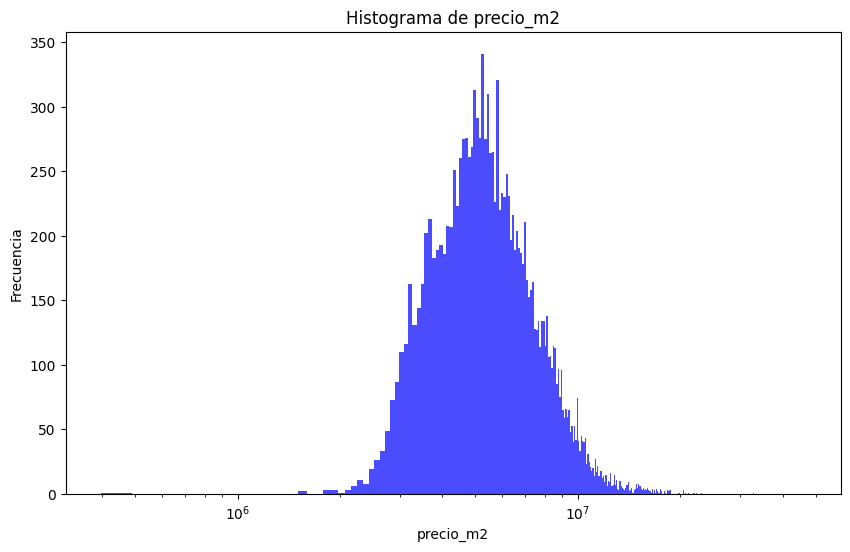

In [2176]:
import matplotlib.pyplot as plt

# Create histogram for 'precio_m2'
plt.figure(figsize=(10, 6))
plt.hist(df_piso['precio_m2'].dropna(), bins=500, color='blue', alpha=0.7)
plt.title('Histograma de precio_m2')
plt.xscale('log')
plt.xlabel('precio_m2')
plt.ylabel('Frecuencia')
plt.show()


In [2178]:
for col in ['precio_venta', 'area', 'latitud', 'longitud', 'habitaciones', 'banios']:
    df_piso[col] = pd.to_numeric(df_piso[col], errors='coerce')

In [2179]:
# Filtrar solo columnas numéricas de df_piso
numeric_summary = df_piso.select_dtypes(include=['number']).describe().T
numeric_summary


,count,mean,std,min,25%,50%,75%,max
latitud,"14,242.000000",4.682088,0.100140,0.000000,4.652847,4.689030,4.719873,4.800371
longitud,"14,242.000000",-74.050948,1.388618,-76.551679,-74.103966,-74.059106,-74.045661,0.000000
area,"14,242.000000",103.904318,75.001894,20.000000,54.000000,78.000000,127.000000,780.000000
area_total,2.000000,179.500000,85.559921,119.000000,149.250000,179.500000,209.750000,240.000000
habitaciones,"14,242.000000",2.634742,0.789116,1.000000,2.000000,3.000000,3.000000,10.000000
banios,"14,242.000000",2.369892,1.107881,1.000000,2.000000,2.000000,3.000000,8.000000
parqueaderos,"14,242.000000",1.294481,1.107613,0.000000,0.000000,1.000000,2.000000,15.000000
precio_venta,"14,242.000000","708,193,421.590718","753,812,682.951434","110,000,000.000000","265,000,000.000000","460,000,000.000000","830,000,000.000000","10,000,000,000.000000"
precio_usd,"14,242.000000","172,598.377871","183,848.959529","26,713.620000","63,947.670000","112,274.540000","202,582.310000","2,440,750.770000"
tasa_de_cambio,"14,242.000000","4,104.484116",20.662206,"4,075.000000","4,097.100000","4,097.100000","4,097.100000","4,158.938480"


In [2289]:
# Limpiar columna 'precio_venta': eliminar símbolos y convertir a numérico
df_piso['precio_venta'] = (
    df_piso['precio_venta']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)  # Elimina todo excepto números y puntos
    .replace('', np.nan)
    .astype(float)
)

# Eliminar nulos
precio_clean = df_piso['precio_venta'].dropna()

# Calcular IQR sobre precio limpio
Q1 = precio_clean.quantile(0.25)
Q3 = precio_clean.quantile(0.75)
IQR = Q3 - Q1

# Definir umbrales
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Detectar outliers
outliers_iqr = df_piso[
    (df_piso['precio_venta'] < lower_bound) | 
    (df_piso['precio_venta'] > upper_bound)
]

print(f"Outliers detectados con IQR en precio_venta: {outliers_iqr.shape[0]}")
display(outliers_iqr[['precio_venta']].sort_values('precio_venta'))


Outliers detectados con IQR en precio_venta: 95


,precio_venta
2844,"2,350,000,000.000000"
2600,"2,350,000,000.000000"
5988,"2,350,000,000.000000"
3258,"2,350,000,000.000000"
9453,"2,350,000,000.000000"
10126,"2,350,000,000.000000"
8303,"2,350,000,000.000000"
11925,"2,350,000,000.000000"
12243,"2,350,000,000.000000"
12280,"2,350,000,000.000000"


In [2264]:
# Eliminar outliers de 'precio_venta' basados en IQR
df_piso = df_piso[
    (df_piso['precio_venta'] >= lower_bound) &
    (df_piso['precio_venta'] <= upper_bound)
].copy()

# Confirmar cuántos registros quedan
print(f"Número de registros después de eliminar outliers en 'precio_venta': {df_piso.shape[0]}")


Número de registros después de eliminar outliers en 'precio_venta': 13804


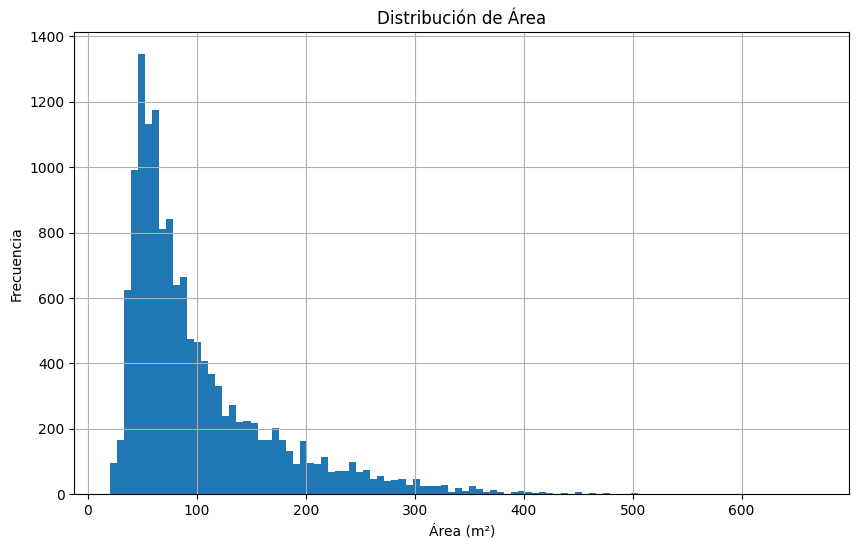

In [2265]:
import matplotlib.pyplot as plt

# Histograma para la variable 'area'
plt.figure(figsize=(10, 6))
df['area'].dropna().hist(bins=100)
plt.title('Distribución de Área')
plt.xlabel('Área (m²)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


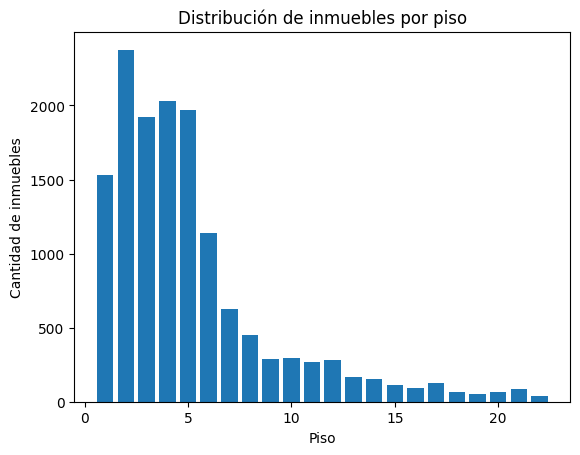

In [2266]:
import matplotlib.pyplot as plt

# Asumiendo que df ya existe en memoria con la columna 'piso'
piso_counts = df['piso'].value_counts().sort_index()

plt.figure()
plt.bar(piso_counts.index, piso_counts.values)
plt.xlabel('Piso')
plt.ylabel('Cantidad de inmuebles')
plt.title('Distribución de inmuebles por piso')
plt.show()

In [2267]:
# Count occurrences of each locality in 'subzona'
subzona_counts = df_piso['subzona'].value_counts().reset_index()
subzona_counts.columns = ['subzona', 'count']

display(subzona_counts)


,subzona,count
0,Usaquén,4064
1,Suba,2725
2,Chapinero,2321
3,Kennedy,980
4,Fontibón,834
5,Engativá,653
6,Teusaquillo,486
7,Bosa,426
8,Ciudad Bolivar,264
9,Barrios Unidos,214


Se remueven las filas que tengan latitud o longitud igual a 0

In [2268]:
# Remove rows where latitude or longitude is zero
df_piso = df_piso[
    (df_piso['latitud'] != 0.0) |
    (df_piso['longitud'] != 0.0)
].reset_index(drop=True)

# Display updated count
print(f"Rows after removal: {df_piso.shape[0]}")


Rows after removal: 13804


In [2269]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.impute import SimpleImputer

# ---------------------------------------------------------------
# df_piso contiene solo apartamentos con 'piso' válido
df = df_piso.copy()

# 1) Garantiza que las columnas numéricas sean numéricas
for col in ['precio_venta', 'area', 'latitud', 'longitud', 'habitaciones', 'banios']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [2270]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import pandas as pd

# ---------------------------------------------------------------
# 1) Select the features
# ---------------------------------------------------------------
features = ['longitud','latitud']
X = df[features].values.copy()

# ---------------------------------------------------------------
# 2) Standardize each feature (mean = 0, std = 1)
# ---------------------------------------------------------------


# ---------------------------------------------------------------
# 3) Apply custom weights
#    - give very high importance to 'precio_m2'
#    - give high importance to 'area'
# ---------------------------------------------------------------
weights = np.ones(X.shape[1])
weights[features.index('longitud')] = 1
weights[features.index('latitud')] = 1

X_weighted = X * weights                # broadcast weights

# ---------------------------------------------------------------
# 4) Run MiniBatchKMeans with your chosen K
# ---------------------------------------------------------------
k = 18                    # set desired number of clusters
kmeans = MiniBatchKMeans(
    n_clusters=k,
    batch_size= 1400,
    random_state=42
)
df['cluster'] = kmeans.fit_predict(X_weighted)

# --------------------------------------------------------------
cluster_counts = df['cluster'].value_counts().sort_index()

# Display the counts
display(cluster_counts)

cluster
0      450
1      471
2     1284
3      431
4     1830
5      703
6       98
7      406
8      898
9      693
10    2132
11     905
12     289
13     326
14    1240
15     650
16     637
17     361
Name: count, dtype: int64

In [2277]:
import numpy as np
import pandas as pd

# ---------------------------------------------------------------
# Polynomial regression (degree 2) of precio_m2 ~ piso per cluster
# Exclude clusters with fewer than 10 elements
# Average slope over pisos 1–15 (predicted if missing)
# ---------------------------------------------------------------
degree = 3      # grado del polinomio
target_piso = 12

results = []

for c, grp in df[['cluster', 'piso', 'precio_m2']].dropna().groupby('cluster'):
    # Total number of records in cluster
    N_cluster = len(grp)
    if N_cluster < 10:
        continue                      # skip clusters with <10 registros
    
    # Promedio real de precio_m2 por piso observado
    mean_by_piso = grp.groupby('piso')['precio_m2'].mean().sort_index()
    x_obs = mean_by_piso.index.to_numpy()
    y_obs = mean_by_piso.values
    
    # Need at least degree+1 points to fit a quadratic
    if len(x_obs) < degree + 1:
        continue
    
    # Ajuste polinómico
    coefs = np.polyfit(x_obs, y_obs, degree)
    
    # Derivada del polinomio
    deriv_coefs = np.polyder(coefs)
    
    # -------- NUEVO: evaluar la pendiente en todos los pisos 1–15 --------
    full_range = np.arange(1, target_piso + 1)      # [1,2,...,15]
    slopes = np.polyval(deriv_coefs, full_range)    # pendiente en cada piso
    avg_slope = slopes.mean()                       # promedio de esas 15 pendientes
    
    # Predicción del precio_m2 en el piso 15
    pred_price_15 = np.polyval(coefs, target_piso)
    
    results.append({
        'cluster': c,
        'avg_Δ_COP_m2_per_piso': round(avg_slope, 0),
        'N': N_cluster
    })

poly_results = pd.DataFrame(results).sort_values('cluster')
display(poly_results)


,cluster,avg_Δ_COP_m2_per_piso,N
0,0,"193,970.000000",450
1,1,"63,364.000000",471
2,2,"120,692.000000",1284
3,3,"57,607.000000",431
4,4,"177,944.000000",1830
5,5,"105,380.000000",703
6,6,"108,057.000000",98
7,7,"55,526.000000",406
8,8,"73,610.000000",898
9,9,"52,039.000000",693


In [2278]:

# 2) Promedio ponderado por tamaño de muestra 'N'
promedio_ponderado = (poly_results['avg_Δ_COP_m2_per_piso'] * poly_results['N']).sum() / poly_results['N'].sum()

print(f"Promedio ponderado de β₁: {promedio_ponderado:,.2f} COP/m²·piso")

Promedio ponderado de β₁: 126,371.21 COP/m²·piso


## ¿En cuánto puede llegar a variar el precio de un inmueble según el piso en el que se encuentra? 

In [2279]:
# Calcular el valor
valor = 70 * promedio_ponderado

# Formatear como pesos (sin decimales, miles con puntos)
valor_formateado = f"${valor:,.0f}".replace(",", ".")

# Imprimir bonito
print(f"Valor promedio ponderado: {valor_formateado}")


Valor promedio ponderado: $8.845.985


### Clusters

In [2276]:
pd.set_option('display.float_format', '{:,.6f}'.format)

# 1) Asegúrate de que 'df' es tu DataFrame con 'cluster' y variables numéricas
#    (precio_venta, area, precio_m2, piso, etc.)

# 2) Mostrar 5 ejemplos por clúster
print("=== 5 Ejemplos por Clúster ===")
for c in sorted(df['cluster'].unique()):
    print(f"\n--- Clúster {c} ---")
    display(df[df['cluster'] == c]
            .loc[:, ['piso', 'precio_venta', 'area', 'precio_m2',
                     'latitud', 'longitud', 'habitaciones', 'banios','subzona']]
            .head(5))

# 3) Describir estadísticas por clúster
print("\n=== Estadísticas Descriptivas por Clúster ===")
for c in sorted(df['cluster'].unique()):
    print(f"\n--- Clúster {c} ---")
    display(df[df['cluster'] == c]
            .loc[:, ['piso', 'precio_venta', 'area', 'precio_m2','subzona',
                     'latitud', 'longitud', 'habitaciones', 'banios']]
            .describe().T)  # .T para ver variables como filas

=== 5 Ejemplos por Clúster ===

--- Clúster 0 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
38,4.000000,"560,000,000.000000",95.000000,"5,894,736.842105",4.623554,-74.073373,3,2,Teusaquillo
81,2.000000,"330,000,000.000000",41.000000,"8,048,780.487805",4.626337,-74.067143,2,2,Puente Aranda
86,3.000000,"400,000,000.000000",68.030000,"5,879,758.929884",4.612118,-74.066254,3,2,Santa Fé
93,1.000000,"195,000,000.000000",28.070000,"6,946,918.418240",4.602363,-74.068925,1,1,Santa Fé
128,6.000000,"315,000,000.000000",56.000000,"5,625,000.000000",4.618620,-74.071799,2,1,Teusaquillo



--- Clúster 1 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
2,4.000000,"182,000,000.000000",50.000000,"3,640,000.000000",4.713269,-74.123799,3,1,Engativá
60,3.000000,"470,000,000.000000",80.000000,"5,875,000.000000",4.700620,-74.101590,3,3,Engativá
74,1.000000,"150,000,000.000000",50.000000,"3,000,000.000000",4.713489,-74.139022,3,1,Engativá
115,6.000000,"220,000,000.000000",41.000000,"5,365,853.658537",4.709878,-74.136325,2,1,Engativá
134,4.000000,"195,000,000.000000",52.000000,"3,750,000.000000",4.729497,-74.114815,2,1,Engativá



--- Clúster 2 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
24,6.000000,"435,000,000.000000",99.000000,"4,393,939.393939",4.719453,-74.033764,2,2,Usaquén
25,13.000000,"798,000,000.000000",98.000000,"8,142,857.142857",4.731054,-74.035486,3,3,Usaquén
30,6.000000,"650,000,000.000000",120.000000,"5,416,666.666667",4.724350,-74.030789,3,3,Usaquén
33,15.000000,"677,000,000.000000",164.000000,"4,128,048.780488",4.731341,-74.032339,3,4,Usaquén
67,2.000000,"480,000,000.000000",80.000000,"6,000,000.000000",4.728485,-74.043438,4,3,Puente Aranda



--- Clúster 3 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
17,3.000000,"150,000,000.000000",45.000000,"3,333,333.333333",4.625808,-74.194135,3,1,Bosa
62,4.000000,"133,500,000.000000",47.000000,"2,840,425.531915",4.625220,-74.200982,3,1,Bosa
87,16.000000,"190,000,000.000000",47.000000,"4,042,553.191489",4.614295,-74.194939,2,2,Bosa
152,4.000000,"120,000,000.000000",43.000000,"2,790,697.674419",4.627089,-74.204077,3,1,Bosa
194,6.000000,"120,000,000.000000",37.000000,"3,243,243.243243",4.637965,-74.189060,2,1,Bosa



--- Clúster 4 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
4,2.000000,"650,000,000.000000",76.000000,"8,552,631.578947",4.662464,-74.045497,1,2,Chapinero
6,8.000000,"1,700,000,000.000000",240.000000,"7,083,333.333333",4.686694,-74.054847,4,3,Usaquén
9,4.000000,"1,500,000,000.000000",241.000000,"6,224,066.390041",4.661212,-74.048039,3,3,Chapinero
12,1.000000,"635,000,000.000000",135.480000,"4,687,038.677296",4.685735,-74.044743,3,3,Usaquén
19,2.000000,"1,050,000,000.000000",119.000000,"8,823,529.411765",4.680098,-74.051097,2,3,Chapinero



--- Clúster 5 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
5,4.000000,"350,000,000.000000",71.500000,"4,895,104.895105",4.665933,-74.132168,3,2,Fontibón
22,3.000000,"275,000,000.000000",51.700000,"5,319,148.936170",4.669606,-74.138105,3,2,Fontibón
27,4.000000,"370,000,000.000000",75.000000,"4,933,333.333333",4.664633,-74.137768,3,2,Fontibón
40,2.000000,"850,000,000.000000",92.000000,"9,239,130.434783",4.657730,-74.108868,4,2,Fontibón
52,11.000000,"750,000,000.000000",106.000000,"7,075,471.698113",4.660789,-74.103608,3,2,Engativá



--- Clúster 6 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
261,2.000000,"110,000,000.000000",48.000000,"2,291,666.666667",4.472960,-74.128213,3,1,Usme
329,4.000000,"150,000,000.000000",42.000000,"3,571,428.571429",4.528792,-74.083952,3,1,San Cristóbal
582,5.000000,"250,000,000.000000",46.210000,"5,410,084.397317",4.504418,-74.111763,2,2,Usme
930,3.000000,"270,000,000.000000",37.000000,"7,297,297.297297",4.524235,-74.118172,1,1,Usme
991,3.000000,"159,000,000.000000",56.000000,"2,839,285.714286",4.509634,-74.119998,3,2,Usme



--- Clúster 7 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
28,22.000000,"198,000,000.000000",38.000000,"5,210,526.315789",4.594982,-74.158162,2,1,Ciudad Bolivar
54,3.000000,"185,000,000.000000",49.770000,"3,717,098.653808",4.605971,-74.145356,3,1,Kennedy
63,6.000000,"200,000,000.000000",42.000000,"4,761,904.761905",4.597916,-74.159043,2,1,Bosa
91,14.000000,"220,000,000.000000",62.000000,"3,548,387.096774",4.582829,-74.161523,3,2,Ciudad Bolivar
135,3.000000,"285,000,000.000000",57.000000,"5,000,000.000000",4.572463,-74.169953,3,2,Ciudad Bolivar



--- Clúster 8 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
29,4.000000,"680,000,000.000000",127.000000,"5,354,330.708661",4.703732,-74.071354,4,3,Suba
36,16.000000,"240,000,000.000000",45.000000,"5,333,333.333333",4.720608,-74.089032,2,1,Suba
71,2.000000,"500,000,000.000000",111.000000,"4,504,504.504505",4.721758,-74.074798,3,2,Suba
148,6.000000,"385,000,000.000000",82.000000,"4,695,121.951220",4.710989,-74.072092,3,2,Suba
149,1.000000,"575,000,000.000000",109.000000,"5,275,229.357798",4.704139,-74.060018,3,3,Suba



--- Clúster 9 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
8,2.000000,"310,000,000.000000",82.000000,"3,780,487.804878",4.639334,-74.136098,3,2,Kennedy
48,1.000000,"340,000,000.000000",79.000000,"4,303,797.468354",4.629859,-74.149997,4,1,Kennedy
51,8.000000,"160,000,000.000000",51.000000,"3,137,254.901961",4.650628,-74.168005,3,1,Kennedy
72,3.000000,"330,000,000.000000",55.000000,"6,000,000.000000",4.643211,-74.144123,3,2,Kennedy
160,12.000000,"285,000,000.000000",58.000000,"4,913,793.103448",4.645811,-74.137090,3,2,Kennedy



--- Clúster 10 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
0,5.000000,"560,000,000.000000",96.000000,"5,833,333.333333",4.695880,-74.052039,3,3,Usaquén
11,4.000000,"1,250,000,000.000000",194.000000,"6,443,298.969072",4.709579,-74.050762,3,5,Usaquén
15,2.000000,"550,000,000.000000",88.000000,"6,250,000.000000",4.693233,-74.052420,3,2,Usaquén
32,3.000000,"1,150,000,000.000000",238.000000,"4,831,932.773109",4.708507,-74.040810,3,4,Usaquén
44,4.000000,"530,000,000.000000",138.000000,"3,840,579.710145",4.706330,-74.056062,3,3,Puente Aranda



--- Clúster 11 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
1,5.000000,"225,000,000.000000",53.800000,"4,182,156.133829",4.727520,-74.055471,2,2,Suba
14,2.000000,"330,000,000.000000",64.000000,"5,156,250.000000",4.730590,-74.064850,3,2,Suba
16,5.000000,"730,000,000.000000",161.900000,"4,508,956.145769",4.731925,-74.055325,5,4,Suba
56,5.000000,"190,000,000.000000",60.000000,"3,166,666.666667",4.743572,-74.046754,2,2,Usaquén
78,4.000000,"970,000,000.000000",130.000000,"7,461,538.461538",4.729100,-74.064000,3,5,Suba



--- Clúster 12 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
3,12.000000,"185,000,000.000000",49.000000,"3,775,510.204082",4.684932,-74.153020,2,1,Fontibón
207,15.000000,"170,000,000.000000",40.000000,"4,250,000.000000",4.695312,-74.167303,3,2,Fontibón
209,13.000000,"225,000,000.000000",35.000000,"6,428,571.428571",4.686263,-74.153727,2,2,Fontibón
247,6.000000,"195,000,000.000000",48.000000,"4,062,500.000000",4.694850,-74.168837,3,2,Fontibón
283,17.000000,"210,000,000.000000",40.000000,"5,250,000.000000",4.684270,-74.163496,2,2,Fontibón



--- Clúster 13 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
37,1.000000,"190,000,000.000000",39.000000,"4,871,794.871795",4.589750,-74.080085,2,1,Chapinero
103,6.000000,"175,000,000.000000",32.270000,"5,422,993.492408",4.591779,-74.106689,2,1,Antonio Nariño
121,4.000000,"290,000,000.000000",72.000000,"4,027,777.777778",4.583930,-74.116771,2,2,Rafael Uribe
223,3.000000,"155,000,000.000000",44.000000,"3,522,727.272727",4.569567,-74.117944,3,2,Rafael Uribe
225,3.000000,"130,000,000.000000",44.000000,"2,954,545.454545",4.555969,-74.107655,2,1,Rafael Uribe



--- Clúster 14 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
18,2.000000,"2,200,000,000.000000",218.000000,"10,091,743.119266",4.659765,-74.052906,5,6,Chapinero
21,3.000000,"330,000,000.000000",52.000000,"6,346,153.846154",4.642860,-74.069538,2,2,Teusaquillo
23,2.000000,"450,000,000.000000",120.000000,"3,750,000.000000",4.634021,-74.063721,3,2,Usaquén
61,3.000000,"1,800,000,000.000000",255.000000,"7,058,823.529412",4.655875,-74.052783,3,4,Chapinero
65,15.000000,"340,000,000.000000",38.000000,"8,947,368.421053",4.645851,-74.065017,1,2,Puente Aranda



--- Clúster 15 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
10,2.000000,"150,000,000.000000",50.000000,"3,000,000.000000",4.749960,-74.110066,2,1,Suba
13,3.000000,"280,000,000.000000",78.000000,"3,589,743.589744",4.752015,-74.101529,3,2,Suba
26,5.000000,"180,000,000.000000",57.000000,"3,157,894.736842",4.748005,-74.107154,3,1,Suba
53,4.000000,"148,000,000.000000",42.000000,"3,523,809.523810",4.752022,-74.111851,3,1,Puente Aranda
57,3.000000,"160,000,000.000000",53.000000,"3,018,867.924528",4.748947,-74.102698,3,1,Suba



--- Clúster 16 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
41,3.000000,"260,000,000.000000",70.000000,"3,714,285.714286",4.768029,-74.030798,3,2,Usaquén
55,4.000000,"190,000,000.000000",52.000000,"3,653,846.153846",4.758504,-74.036078,2,2,Usaquén
58,2.000000,"290,000,000.000000",63.000000,"4,603,174.603175",4.753884,-74.043525,3,2,Usaquén
66,1.000000,"380,000,000.000000",72.000000,"5,277,777.777778",4.744344,-74.042528,3,2,Puente Aranda
100,5.000000,"245,000,000.000000",52.000000,"4,711,538.461538",4.747215,-74.030630,3,1,Usaquén



--- Clúster 17 ---


,piso,precio_venta,area,precio_m2,latitud,longitud,habitaciones,banios,subzona
7,8.000000,"1,850,000,000.000000",237.370000,"7,793,739.731221",4.646200,-74.106343,4,4,Teusaquillo
34,1.000000,"230,000,000.000000",54.000000,"4,259,259.259259",4.624577,-74.113918,3,2,Puente Aranda
35,4.000000,"780,000,000.000000",200.000000,"3,900,000.000000",4.624577,-74.113918,3,2,Teusaquillo
43,10.000000,"145,000,000.000000",38.000000,"3,815,789.473684",4.624577,-74.113918,2,1,Puente Aranda
45,6.000000,"300,000,000.000000",71.000000,"4,225,352.112676",4.624577,-74.113918,2,2,Puente Aranda



=== Estadísticas Descriptivas por Clúster ===

--- Clúster 0 ---


,count,mean,std,min,25%,50%,75%,max
piso,450.000000,6.542222,5.218115,1.000000,3.000000,4.000000,10.000000,22.000000
precio_venta,450.000000,"443,290,313.471111","241,355,453.985718","110,000,000.000000","297,175,000.000000","380,000,000.000000","522,711,000.000000","2,300,000,000.000000"
area,450.000000,72.787022,42.098681,20.000000,44.865000,64.000000,93.000000,315.000000
precio_m2,450.000000,"6,610,726.680070","2,162,284.713498","2,075,471.698113","5,127,533.783784","6,493,243.243243","7,985,448.837604","13,437,500.000000"
latitud,450.000000,4.619332,0.012160,4.591209,4.608510,4.619173,4.629261,4.643330
longitud,450.000000,-74.075473,0.009333,-74.096884,-74.082721,-74.072604,-74.068067,-74.035561
habitaciones,450.000000,2.111111,0.942021,1.000000,1.000000,2.000000,3.000000,5.000000
banios,450.000000,1.795556,0.714456,1.000000,1.000000,2.000000,2.000000,5.000000



--- Clúster 1 ---


,count,mean,std,min,25%,50%,75%,max
piso,471.000000,4.874735,3.416982,1.000000,3.000000,4.000000,6.000000,20.000000
precio_venta,471.000000,"276,133,053.235669","92,850,051.097883","130,000,000.000000","206,000,000.000000","255,000,000.000000","323,500,000.000000","870,000,000.000000"
area,471.000000,61.915541,20.763811,21.000000,50.000000,60.000000,69.340000,360.000000
precio_m2,471.000000,"4,483,135.458087","895,342.225946","1,914,893.617021","3,905,764.966741","4,347,826.086957","5,000,000.000000","8,809,523.809524"
latitud,471.000000,4.713714,0.010642,4.688587,4.703809,4.717111,4.722874,4.743325
longitud,471.000000,-74.120686,0.011895,-74.140402,-74.131144,-74.121380,-74.110125,-74.096167
habitaciones,471.000000,2.811040,0.530320,1.000000,3.000000,3.000000,3.000000,5.000000
banios,471.000000,1.721868,0.523012,1.000000,1.000000,2.000000,2.000000,4.000000



--- Clúster 2 ---


,count,mean,std,min,25%,50%,75%,max
piso,"1,284.000000",4.521028,3.405149,1.000000,2.000000,4.000000,5.000000,21.000000
precio_venta,"1,284.000000","616,865,165.721184","399,132,147.529618","184,320,000.000000","380,000,000.000000","490,000,000.000000","686,000,000.000000","2,500,000,000.000000"
area,"1,284.000000",103.727601,56.069844,20.000000,70.000000,88.000000,115.000000,435.000000
precio_m2,"1,284.000000","5,905,488.301671","1,380,981.556316","2,333,333.333333","4,933,333.333333","5,714,285.714286","6,731,750.392465","15,516,149.461685"
latitud,"1,284.000000",4.723594,0.006498,4.708909,4.719081,4.723606,4.727587,4.739441
longitud,"1,284.000000",-74.036621,0.007775,-74.055374,-74.042632,-74.036317,-74.030714,-74.017169
habitaciones,"1,284.000000",2.671340,0.758072,1.000000,2.000000,3.000000,3.000000,6.000000
banios,"1,284.000000",2.558411,0.959272,1.000000,2.000000,2.000000,3.000000,7.000000



--- Clúster 3 ---


,count,mean,std,min,25%,50%,75%,max
piso,431.000000,4.888631,3.586361,1.000000,3.000000,4.000000,6.000000,20.000000
precio_venta,431.000000,"152,334,968.250580","32,112,998.985843","110,000,000.000000","130,000,000.000000","144,100,000.000000","167,000,000.000000","449,000,000.000000"
area,431.000000,46.402552,6.871248,31.000000,42.000000,46.000000,49.000000,80.830000
precio_m2,431.000000,"3,292,796.361304","502,137.541433","2,370,370.370370","2,961,581.481481","3,202,222.222222","3,540,270.270270","6,122,448.979592"
latitud,431.000000,4.625030,0.061345,3.371202,4.621135,4.627386,4.634925,4.643953
longitud,431.000000,-74.199038,0.114080,-76.551679,-74.202633,-74.192116,-74.186441,-74.171320
habitaciones,431.000000,2.494200,0.500547,2.000000,2.000000,2.000000,3.000000,3.000000
banios,431.000000,1.227378,0.425132,1.000000,1.000000,1.000000,1.000000,3.000000



--- Clúster 4 ---


,count,mean,std,min,25%,50%,75%,max
piso,"1,830.000000",4.143716,2.572216,1.000000,2.000000,4.000000,5.000000,18.000000
precio_venta,"1,830.000000","1,100,437,074.148088","548,271,373.677127","155,000,009.000000","650,000,000.000000","969,000,000.000000","1,450,000,000.000000","2,500,000,000.000000"
area,"1,830.000000",141.802027,66.539293,20.000000,90.000000,132.000000,178.000000,427.000000
precio_m2,"1,830.000000","7,999,780.706738","2,482,390.933484","2,352,941.176471","6,215,504.128640","7,638,667.869015","9,148,936.170213","20,232,017.452440"
latitud,"1,830.000000",4.677310,0.008045,4.661045,4.671569,4.678000,4.683057,4.694507
longitud,"1,830.000000",-74.051808,0.007788,-74.086990,-74.055737,-74.051050,-74.045941,-74.028842
habitaciones,"1,830.000000",2.563388,0.835302,1.000000,2.000000,3.000000,3.000000,5.000000
banios,"1,830.000000",3.004918,1.024830,1.000000,2.000000,3.000000,4.000000,6.000000



--- Clúster 5 ---


,count,mean,std,min,25%,50%,75%,max
piso,703.000000,5.820768,4.382596,1.000000,2.000000,5.000000,8.000000,22.000000
precio_venta,703.000000,"481,508,928.109531","288,675,429.300112","160,000,000.000000","310,000,000.000000","420,000,000.000000","550,000,000.000000","2,500,000,000.000000"
area,703.000000,76.786558,36.649844,24.830000,58.000000,69.700000,85.285000,368.000000
precio_m2,703.000000,"6,237,290.244746","1,621,889.315192","2,000,000.000000","5,151,361.161525","5,925,925.925926","7,071,069.182390","14,843,750.000000"
latitud,703.000000,4.663117,0.008806,4.644147,4.656658,4.661747,4.669327,4.686238
longitud,703.000000,-74.121041,0.012235,-74.141247,-74.131661,-74.123383,-74.111360,-74.087655
habitaciones,703.000000,2.761024,0.733656,1.000000,2.000000,3.000000,3.000000,10.000000
banios,703.000000,2.082504,0.713339,1.000000,2.000000,2.000000,2.000000,6.000000



--- Clúster 6 ---


,count,mean,std,min,25%,50%,75%,max
piso,98.000000,4.877551,3.581929,1.000000,3.000000,4.500000,6.000000,17.000000
precio_venta,98.000000,"184,705,102.040816","181,808,908.615753","110,000,000.000000","128,500,000.000000","152,500,000.000000","180,000,000.000000","1,750,000,000.000000"
area,98.000000,51.399796,15.282880,30.000000,46.000000,48.500000,52.000000,149.000000
precio_m2,98.000000,"3,433,463.110243","1,528,418.067504","1,828,571.428571","2,682,363.261992","3,152,904.761905","3,471,153.846154","11,744,966.442953"
latitud,98.000000,4.504442,0.066730,3.990301,4.491648,4.525287,4.532614,4.546743
longitud,98.000000,-74.120253,0.019754,-74.251099,-74.125384,-74.117884,-74.114039,-74.083952
habitaciones,98.000000,2.581633,0.554707,1.000000,2.000000,3.000000,3.000000,4.000000
banios,98.000000,1.540816,0.577381,1.000000,1.000000,2.000000,2.000000,4.000000



--- Clúster 7 ---


,count,mean,std,min,25%,50%,75%,max
piso,406.000000,7.613300,6.023470,1.000000,3.000000,5.000000,12.000000,22.000000
precio_venta,406.000000,"215,724,437.783251","59,117,612.782365","110,000,000.000000","187,200,000.000000","205,000,000.000000","230,000,000.000000","801,851,740.000000"
area,406.000000,52.581921,17.389033,21.000000,43.000000,50.450000,59.000000,280.000000
precio_m2,406.000000,"4,207,996.595592","813,308.773578","2,307,692.307692","3,638,289.676425","4,090,909.090909","4,802,278.239778","7,428,571.428571"
latitud,406.000000,4.593239,0.010360,4.550968,4.586234,4.592528,4.597939,4.618393
longitud,406.000000,-74.157729,0.008276,-74.182310,-74.161756,-74.159155,-74.155051,-74.133301
habitaciones,406.000000,2.674877,0.634567,1.000000,2.000000,3.000000,3.000000,10.000000
banios,406.000000,1.561576,0.583647,1.000000,1.000000,2.000000,2.000000,6.000000



--- Clúster 8 ---


,count,mean,std,min,25%,50%,75%,max
piso,898.000000,4.992205,4.017929,1.000000,2.000000,4.000000,6.000000,22.000000
precio_venta,898.000000,"567,577,470.940980","350,087,831.463925","138,000,000.000000","336,250,000.000000","494,000,000.000000","699,750,000.000000","2,300,000,000.000000"
area,898.000000,98.581325,52.335141,24.860000,62.250000,89.000000,120.000000,440.000000
precio_m2,898.000000,"5,703,611.990429","1,472,575.704067","2,888,888.888889","4,714,285.714286","5,485,744.716522","6,401,829.268293","13,901,760.889713"
latitud,898.000000,4.711221,0.011057,4.684000,4.702960,4.711610,4.720793,4.731159
longitud,898.000000,-74.071967,0.010287,-74.096250,-74.080683,-74.070305,-74.063181,-74.054247
habitaciones,898.000000,2.756125,0.723542,1.000000,2.000000,3.000000,3.000000,5.000000
banios,898.000000,2.427617,0.989237,1.000000,2.000000,2.000000,3.000000,6.000000



--- Clúster 9 ---


,count,mean,std,min,25%,50%,75%,max
piso,693.000000,6.797980,5.135690,1.000000,3.000000,5.000000,9.000000,22.000000
precio_venta,693.000000,"236,994,698.269841","103,493,209.995602","110,910,543.000000","175,000,000.000000","210,000,000.000000","280,000,000.000000","1,420,000,000.000000"
area,693.000000,53.540952,14.389774,31.000000,43.000000,52.000000,60.000000,188.000000
precio_m2,693.000000,"4,416,939.079483","1,429,249.467963","2,300,000.000000","3,600,000.000000","4,333,333.333333","5,128,205.128205","32,857,142.857143"
latitud,693.000000,4.645935,0.006527,4.619873,4.643077,4.647721,4.650089,4.655609
longitud,693.000000,-74.152449,0.010336,-74.174810,-74.158478,-74.151754,-74.144968,-74.133518
habitaciones,693.000000,2.607504,0.590436,1.000000,2.000000,3.000000,3.000000,7.000000
banios,693.000000,1.552670,0.531286,1.000000,1.000000,2.000000,2.000000,4.000000



--- Clúster 10 ---


,count,mean,std,min,25%,50%,75%,max
piso,"2,132.000000",3.825516,2.385343,1.000000,2.000000,3.000000,5.000000,22.000000
precio_venta,"2,132.000000","896,923,410.754690","446,331,293.652758","185,000,000.000000","570,000,000.000000","780,000,000.000000","1,150,000,000.000000","2,500,000,000.000000"
area,"2,132.000000",133.971731,66.596900,20.000000,84.000000,119.000000,170.000000,500.000000
precio_m2,"2,132.000000","6,930,871.975520","1,786,742.042294","2,564,102.564103","5,647,727.272727","6,574,964.050556","7,952,272.727273","17,505,660.377358"
latitud,"2,132.000000",4.698710,0.005863,4.683777,4.694104,4.698835,4.703337,4.713265
longitud,"2,132.000000",-74.042579,0.008319,-74.062281,-74.048899,-74.042864,-74.036000,-74.024370
habitaciones,"2,132.000000",2.634615,0.869302,1.000000,2.000000,3.000000,3.000000,7.000000
banios,"2,132.000000",3.042683,1.046797,1.000000,2.000000,3.000000,4.000000,6.000000



--- Clúster 11 ---


,count,mean,std,min,25%,50%,75%,max
piso,905.000000,6.049724,4.693099,1.000000,3.000000,5.000000,8.000000,22.000000
precio_venta,905.000000,"528,769,509.200000","327,735,272.604517","165,000,000.000000","308,000,000.000000","430,000,000.000000","640,000,000.000000","2,500,000,000.000000"
area,905.000000,89.400564,46.259718,30.000000,59.880000,78.000000,104.000000,349.900000
precio_m2,905.000000,"5,829,649.176095","1,240,911.468604","2,933,333.333333","4,918,032.786885","5,616,883.116883","6,587,677.725118","11,735,294.117647"
latitud,905.000000,4.741139,0.007885,4.724070,4.735127,4.740738,4.746916,4.764810
longitud,905.000000,-74.061115,0.006602,-74.080810,-74.066210,-74.061610,-74.056129,-74.044080
habitaciones,905.000000,2.817680,0.595816,1.000000,3.000000,3.000000,3.000000,5.000000
banios,905.000000,2.285083,0.959609,1.000000,2.000000,2.000000,3.000000,6.000000



--- Clúster 12 ---


,count,mean,std,min,25%,50%,75%,max
piso,289.000000,7.813149,5.101031,1.000000,4.000000,6.000000,12.000000,20.000000
precio_venta,289.000000,"208,164,554.564014","71,996,141.556351","120,000,000.000000","175,000,000.000000","195,000,000.000000","210,000,000.000000","720,000,000.000000"
area,289.000000,50.203772,13.008051,24.000000,44.550000,48.000000,54.000000,147.000000
precio_m2,289.000000,"4,168,186.154940","839,715.285482","2,380,952.380952","3,611,111.111111","4,000,000.000000","4,642,857.142857","8,125,000.000000"
latitud,289.000000,4.680581,0.008778,4.665230,4.673914,4.681567,4.684270,4.697265
longitud,289.000000,-74.156345,0.009382,-74.170565,-74.165410,-74.157170,-74.148700,-74.136498
habitaciones,289.000000,2.564014,0.543477,1.000000,2.000000,3.000000,3.000000,4.000000
banios,289.000000,1.584775,0.534156,1.000000,1.000000,2.000000,2.000000,4.000000



--- Clúster 13 ---


,count,mean,std,min,25%,50%,75%,max
piso,326.000000,5.530675,4.646651,1.000000,2.000000,4.000000,6.000000,22.000000
precio_venta,326.000000,"282,030,885.331288","206,829,011.220641","115,000,000.000000","190,000,000.000000","225,000,000.000000","302,250,000.000000","2,200,000,000.000000"
area,326.000000,61.407485,32.849881,22.000000,45.000000,52.000000,65.000000,310.000000
precio_m2,326.000000,"4,596,710.781944","1,390,224.916336","1,516,464.471404","3,724,668.638405","4,468,732.549388","5,180,952.380952","11,206,896.551724"
latitud,326.000000,4.579655,0.012843,4.541691,4.569628,4.581246,4.589643,4.605019
longitud,326.000000,-74.101345,0.016259,-74.130539,-74.116687,-74.102546,-74.086647,-74.066071
habitaciones,326.000000,2.579755,0.734693,1.000000,2.000000,3.000000,3.000000,6.000000
banios,326.000000,1.521472,0.630872,1.000000,1.000000,1.000000,2.000000,5.000000



--- Clúster 14 ---


,count,mean,std,min,25%,50%,75%,max
piso,"1,240.000000",4.791935,3.693276,1.000000,2.000000,4.000000,6.000000,22.000000
precio_venta,"1,240.000000","871,159,201.881452","587,124,167.768577","150,000,000.000000","399,500,000.000000","637,500,000.000000","1,300,000,000.000000","2,500,000,000.000000"
area,"1,240.000000",120.155306,75.093934,20.000000,62.000000,98.120000,168.000000,421.000000
precio_m2,"1,240.000000","7,408,109.829501","2,162,383.944784","2,520,000.000000","6,192,307.692308","7,370,066.220379","8,461,538.461538","20,408,163.265306"
latitud,"1,240.000000",4.649980,0.007636,4.632062,4.644440,4.650455,4.656008,4.671756
longitud,"1,240.000000",-74.061213,0.011041,-74.091320,-74.066152,-74.059021,-74.052315,-74.046720
habitaciones,"1,240.000000",2.369355,0.987752,1.000000,2.000000,2.000000,3.000000,9.000000
banios,"1,240.000000",2.488710,1.103170,1.000000,2.000000,2.000000,3.000000,6.000000



--- Clúster 15 ---


,count,mean,std,min,25%,50%,75%,max
piso,650.000000,4.886154,3.789446,1.000000,2.000000,4.000000,6.000000,22.000000
precio_venta,650.000000,"231,585,465.352308","102,149,512.990136","125,000,000.000000","179,000,000.000000","205,000,000.000000","260,000,000.000000","1,600,000,000.000000"
area,650.000000,57.166292,26.915286,28.770000,47.000000,54.000000,62.000000,587.000000
precio_m2,650.000000,"4,121,422.191327","941,944.963516","396,592.844974","3,472,576.530612","3,977,525.252525","4,625,637.755102","8,787,878.787879"
latitud,650.000000,4.748952,0.008249,4.726197,4.744410,4.750446,4.755228,4.800371
longitud,650.000000,-74.095250,0.010610,-74.125050,-74.103422,-74.092794,-74.086555,-74.073200
habitaciones,650.000000,2.669231,0.557737,1.000000,2.000000,3.000000,3.000000,4.000000
banios,650.000000,1.552308,0.583176,1.000000,1.000000,2.000000,2.000000,5.000000



--- Clúster 16 ---


,count,mean,std,min,25%,50%,75%,max
piso,637.000000,6.313972,5.064863,1.000000,3.000000,5.000000,9.000000,22.000000
precio_venta,637.000000,"331,365,698.145997","139,884,810.756454","145,000,000.000000","230,000,000.000000","290,000,000.000000","407,255,000.000000","1,600,000,000.000000"
area,637.000000,63.462433,23.595094,27.000000,43.000000,62.000000,74.720000,200.000000
precio_m2,637.000000,"5,299,443.047696","1,175,807.861394","2,807,017.543860","4,444,444.444444","5,121,951.219512","6,075,949.367089","11,678,832.116788"
latitud,637.000000,4.755408,0.009202,4.739217,4.747975,4.755249,4.762822,4.791958
longitud,637.000000,-74.035039,0.008382,-74.060394,-74.040275,-74.033188,-74.027370,-74.022709
habitaciones,637.000000,2.492936,0.734610,1.000000,2.000000,3.000000,3.000000,4.000000
banios,637.000000,1.759812,0.588478,1.000000,1.000000,2.000000,2.000000,4.000000



--- Clúster 17 ---


,count,mean,std,min,25%,50%,75%,max
piso,361.000000,6.573407,5.207981,1.000000,3.000000,5.000000,9.000000,22.000000
precio_venta,361.000000,"436,183,956.077562","282,297,153.192344","140,000,000.000000","265,000,000.000000","360,000,000.000000","490,000,000.000000","2,200,000,000.000000"
area,361.000000,71.934460,34.514270,30.000000,52.000000,63.000000,83.000000,272.000000
precio_m2,361.000000,"5,929,146.830426","1,473,367.332993","2,537,313.432836","4,907,975.460123","5,700,000.000000","6,716,417.910448","10,000,000.000000"
latitud,361.000000,4.626598,0.012658,4.599076,4.614383,4.625904,4.638830,4.646968
longitud,361.000000,-74.115587,0.012580,-74.140152,-74.127000,-74.113918,-74.105136,-74.093888
habitaciones,361.000000,2.684211,0.649786,1.000000,2.000000,3.000000,3.000000,5.000000
banios,361.000000,1.855956,0.715910,1.000000,1.000000,2.000000,2.000000,5.000000


In [2284]:
# Agregar una columna 'ID' basada en el índice del DataFrame
df['ID'] = df.index

# Mostrar las primeras filas para verificar
display(df.head())

,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,estrato,precio_admon,anhio_construccion,pisos_edificio,piso,ascensor,subzona,precio_m2,cluster,ID
0,4.695880,-74.052039,96.000000,NaN,3,3,2,"560,000,000.000000","136,682.040000","4,097.100000",5,NaN,2003,NaN,5.000000,NaN,Usaquén,"5,833,333.333333",10,0
1,4.727520,-74.055471,53.800000,NaN,2,2,0,"225,000,000.000000","54,916.890000","4,097.100000",3,NaN,2017,NaN,5.000000,NaN,Suba,"4,182,156.133829",11,1
2,4.713269,-74.123799,50.000000,NaN,3,1,0,"182,000,000.000000","44,421.660000","4,097.100000",2,"142,000.000000",1990,NaN,4.000000,NaN,Engativá,"3,640,000.000000",1,2
3,4.684932,-74.153020,49.000000,NaN,2,1,1,"185,000,000.000000","45,153.890000","4,097.100000",2,"130,000.000000",2019,NaN,12.000000,NaN,Fontibón,"3,775,510.204082",12,3
4,4.662464,-74.045497,76.000000,NaN,1,2,0,"650,000,000.000000","158,648.800000","4,097.100000",5,"400,000.000000",2012,NaN,2.000000,NaN,Chapinero,"8,552,631.578947",4,4


In [2287]:
# Guardar el DataFrame con la columna 'cluster' incluida
output_path = r'C:\Users\SantiagoGarcía\Desktop\Duppla\Data\dataset_con_clusters.csv'
df.to_csv(output_path, index=False)

print(f"Dataset guardado exitosamente en: {output_path}")

Dataset guardado exitosamente en: C:\Users\SantiagoGarcía\Desktop\Duppla\Data\dataset_con_clusters.csv


In [2288]:
h = pd.read_csv(r'C:\Users\SantiagoGarcía\Desktop\Duppla\Data\dataset_con_clusters.csv')
h.head()

,latitud,longitud,area,area_total,habitaciones,banios,parqueaderos,precio_venta,precio_usd,tasa_de_cambio,estrato,precio_admon,anhio_construccion,pisos_edificio,piso,ascensor,subzona,precio_m2,cluster,ID
0,4.695880,-74.052039,96.000000,NaN,3,3,2,"560,000,000.000000","136,682.040000","4,097.100000",5,NaN,2003,NaN,5.000000,NaN,Usaquén,"5,833,333.333333",10,0
1,4.727520,-74.055471,53.800000,NaN,2,2,0,"225,000,000.000000","54,916.890000","4,097.100000",3,NaN,2017,NaN,5.000000,NaN,Suba,"4,182,156.133829",11,1
2,4.713269,-74.123799,50.000000,NaN,3,1,0,"182,000,000.000000","44,421.660000","4,097.100000",2,"142,000.000000",1990,NaN,4.000000,NaN,Engativá,"3,640,000.000000",1,2
3,4.684932,-74.153020,49.000000,NaN,2,1,1,"185,000,000.000000","45,153.890000","4,097.100000",2,"130,000.000000",2019,NaN,12.000000,NaN,Fontibón,"3,775,510.204082",12,3
4,4.662464,-74.045497,76.000000,NaN,1,2,0,"650,000,000.000000","158,648.800000","4,097.100000",5,"400,000.000000",2012,NaN,2.000000,NaN,Chapinero,"8,552,631.578947",4,4


In [2281]:
h.shape

(14237, 19)